<a href="https://colab.research.google.com/github/Kishan-Kumar-Zalavadia/Machine-Learning_Project/blob/main/ML_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import libraries

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import random
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

Dataset: https://www.kaggle.com/datasets/ravi72munde/uber-lyft-cab-prices

#Reading data from .csv file using pandas

In [ ]:
ride_data = pd.read_csv("/content/cab_rides.csv")
ride_data.tail()

distance cab_type     time_stamp destination    source  price  \
693066       1.0     Uber  1543708385534   North End  West End   13.0   
693067       1.0     Uber  1543708385534   North End  West End    9.5   
693068       1.0     Uber  1543708385534   North End  West End    NaN   
693069       1.0     Uber  1543708385534   North End  West End   27.0   
693070       1.0     Uber  1543708385534   North End  West End   10.0   

        surge_multiplier                                    id  \
693066               1.0  616d3611-1820-450a-9845-a9ff304a4842   
693067               1.0  633a3fc3-1f86-4b9e-9d48-2b7132112341   
693068               1.0  64d451d0-639f-47a4-9b7c-6fd92fbd264f   
693069               1.0  727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e   
693070               1.0  e7fdc087-fe86-40a5-a3c3-3b2a8badcbda   

                                  product_id       name  
693066  6f72dfc5-27f1-42e8-84db-ccc7a75f6969     UberXL  
693067  55c66225-fbe7-4fd5-9072-eab1ece5e23e      UberX  
693068  8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a       Taxi  
693069  6d318bcc-22a3-4af6-bddd-b409bfce1546  Black SUV  
693070  997acbb5-e102-41e1-b155-9df7de0a73f2   UberPool

In [ ]:
ride_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [ ]:
ride_data.describe()

distance    time_stamp          price  surge_multiplier
count  693071.000000  6.930710e+05  637976.000000     693071.000000
mean        2.189430  1.544046e+12      16.545125          1.013870
std         1.138937  6.891925e+08       9.324359          0.091641
min         0.020000  1.543204e+12       2.500000          1.000000
25%         1.280000  1.543444e+12       9.000000          1.000000
50%         2.160000  1.543737e+12      13.500000          1.000000
75%         2.920000  1.544828e+12      22.500000          1.000000
max         7.860000  1.545161e+12      97.500000          3.000000

In [ ]:
weather_data = pd.read_csv("/content/weather.csv")
weather_data.tail()

temp                 location  clouds  pressure  rain  time_stamp  \
6271  44.72            North Station    0.89   1000.69   NaN  1543819974   
6272  44.85  Northeastern University    0.88   1000.71   NaN  1543819974   
6273  44.82            South Station    0.89   1000.70   NaN  1543819974   
6274  44.78         Theatre District    0.89   1000.70   NaN  1543819974   
6275  44.69                 West End    0.89   1000.70   NaN  1543819974   

      humidity  wind  
6271      0.96  1.52  
6272      0.96  1.54  
6273      0.96  1.54  
6274      0.96  1.54  
6275      0.96  1.52

In [ ]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB


<ipython-input-7-d30f7589f3d6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = ride_data.corr()


<Axes: >

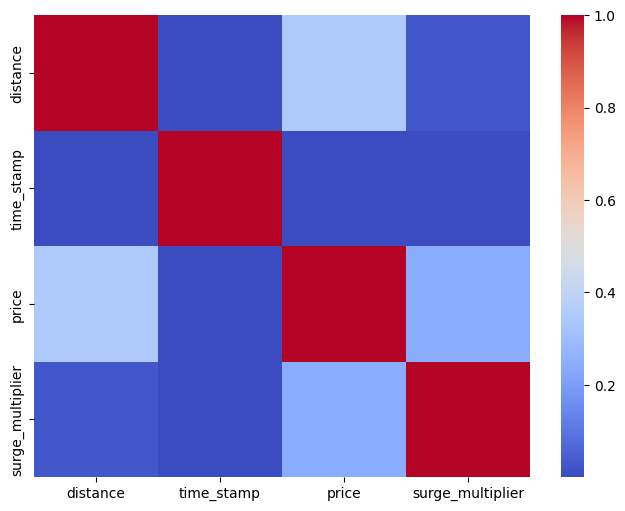

In [ ]:
corr_matrix = ride_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='coolwarm')

<ipython-input-8-9cdaf28390ec>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = weather_data.corr()


<Axes: >

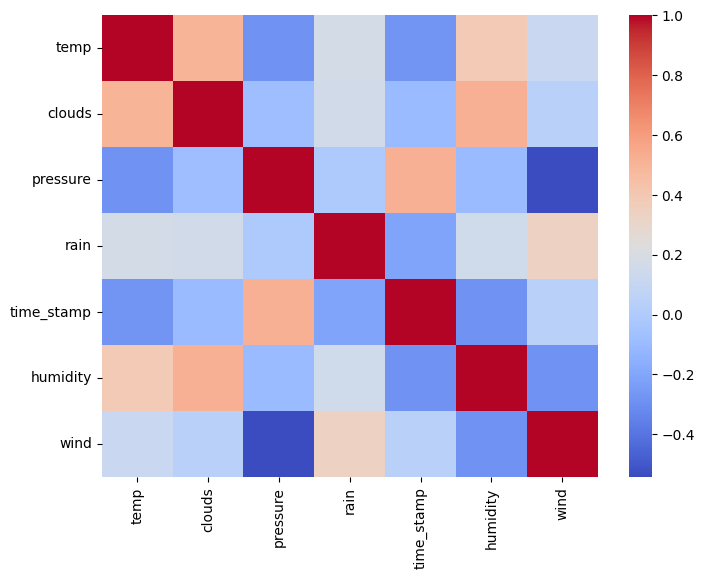

In [ ]:
corr_matrix = weather_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='coolwarm')

Features having orange and red are corrlated with each other.

#Data preprocessing and visualization

In [ ]:
ride_data['time_stamp'] = pd.to_datetime(ride_data['time_stamp']/1000, unit='s')
ride_data['time_stamp']

0        2018-12-16 09:30:07.890000128
1        2018-11-27 02:00:23.676999936
2        2018-11-28 01:00:22.197999872
3        2018-11-30 04:53:02.749000192
4        2018-11-29 03:49:20.223000064
                      ...             
693066   2018-12-01 23:53:05.533999872
693067   2018-12-01 23:53:05.533999872
693068   2018-12-01 23:53:05.533999872
693069   2018-12-01 23:53:05.533999872
693070   2018-12-01 23:53:05.533999872
Name: time_stamp, Length: 693071, dtype: datetime64[ns]

The timestamps are converted to human readable.

In [ ]:
ride_data['date'] = ride_data['time_stamp'].dt.date
ride_data['time'] = ride_data['time_stamp'].dt.hour
ride_data['week_day'] = ride_data['time_stamp'].dt.weekday
ride_data.tail()

distance cab_type                    time_stamp destination    source  \
693066       1.0     Uber 2018-12-01 23:53:05.533999872   North End  West End   
693067       1.0     Uber 2018-12-01 23:53:05.533999872   North End  West End   
693068       1.0     Uber 2018-12-01 23:53:05.533999872   North End  West End   
693069       1.0     Uber 2018-12-01 23:53:05.533999872   North End  West End   
693070       1.0     Uber 2018-12-01 23:53:05.533999872   North End  West End   

        price  surge_multiplier                                    id  \
693066   13.0               1.0  616d3611-1820-450a-9845-a9ff304a4842   
693067    9.5               1.0  633a3fc3-1f86-4b9e-9d48-2b7132112341   
693068    NaN               1.0  64d451d0-639f-47a4-9b7c-6fd92fbd264f   
693069   27.0               1.0  727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e   
693070   10.0               1.0  e7fdc087-fe86-40a5-a3c3-3b2a8badcbda   

                                  product_id       name        date  time  \
693066  6f72dfc5-27f1-42e8-84db-ccc7a75f6969     UberXL  2018-12-01    23   
693067  55c66225-fbe7-4fd5-9072-eab1ece5e23e      UberX  2018-12-01    23   
693068  8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a       Taxi  2018-12-01    23   
693069  6d318bcc-22a3-4af6-bddd-b409bfce1546  Black SUV  2018-12-01    23   
693070  997acbb5-e102-41e1-b155-9df7de0a73f2   UberPool  2018-12-01    23   

        week_day  
693066         5  
693067         5  
693068         5  
693069         5  
693070         5

The date and time is extrated from the time stamp and store separately.

In [ ]:
'''X = ride_data
destination_mapping = {'Back Bay': 0, 'Beacon Hill': 1, 'Boston University': 2, 'Fenway': 3,
                        'Financial District': 4, 'Haymarket Square': 5, 'North End': 6,
                        'North Station': 7, 'Northeastern University': 8, 'South Station': 9,
                        'Theatre District': 10, 'West End': 11}

source_mapping = {'Back Bay': 0, 'Beacon Hill': 1, 'Boston University': 2, 'Fenway': 3,
                   'Financial District': 4, 'Haymarket Square': 5, 'North End': 6,
                   'North Station': 7, 'Northeastern University': 8, 'South Station': 9,
                   'Theatre District': 10, 'West End': 11}

# Map the values using the map function
X['destination'] = X['destination'].map(destination_mapping)
X['source'] = X['source'].map(source_mapping)
X['cab_type'] = X['cab_type'].replace({'Uber': 0, 'Lyft': 1})
X['date'] = X.date.astype('string').str.replace("-","").astype(int)
X'''

'X = ride_data\ndestination_mapping = {\'Back Bay\': 0, \'Beacon Hill\': 1, \'Boston University\': 2, \'Fenway\': 3,\n                        \'Financial District\': 4, \'Haymarket Square\': 5, \'North End\': 6,\n                        \'North Station\': 7, \'Northeastern University\': 8, \'South Station\': 9,\n                        \'Theatre District\': 10, \'West End\': 11}\n\nsource_mapping = {\'Back Bay\': 0, \'Beacon Hill\': 1, \'Boston University\': 2, \'Fenway\': 3,\n                   \'Financial District\': 4, \'Haymarket Square\': 5, \'North End\': 6,\n                   \'North Station\': 7, \'Northeastern University\': 8, \'South Station\': 9,\n                   \'Theatre District\': 10, \'West End\': 11}\n\n# Map the values using the map function\nX[\'destination\'] = X[\'destination\'].map(destination_mapping)\nX[\'source\'] = X[\'source\'].map(source_mapping)\nX[\'cab_type\'] = X[\'cab_type\'].replace({\'Uber\': 0, \'Lyft\': 1})\nX[\'date\'] = X.date.astype(\'string\

In [ ]:
'''corr_matrix = X.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='coolwarm')'''

"corr_matrix = X.corr()\nplt.figure(figsize=(8, 6))\nsns.heatmap(corr_matrix, cmap='coolwarm')"

In [ ]:
weather_data['time_stamp'] = pd.to_datetime(weather_data['time_stamp'], unit='s')
weather_data['time_stamp']

0      2018-12-16 23:45:01
1      2018-12-16 23:45:01
2      2018-12-16 23:45:01
3      2018-12-16 23:45:01
4      2018-12-16 23:45:01
               ...        
6271   2018-12-03 06:52:54
6272   2018-12-03 06:52:54
6273   2018-12-03 06:52:54
6274   2018-12-03 06:52:54
6275   2018-12-03 06:52:54
Name: time_stamp, Length: 6276, dtype: datetime64[ns]

In [ ]:
weather_data['date'] = weather_data['time_stamp'].dt.date
weather_data['time'] = weather_data['time_stamp'].dt.hour
weather_data.tail()

temp                 location  clouds  pressure  rain  \
6271  44.72            North Station    0.89   1000.69   NaN   
6272  44.85  Northeastern University    0.88   1000.71   NaN   
6273  44.82            South Station    0.89   1000.70   NaN   
6274  44.78         Theatre District    0.89   1000.70   NaN   
6275  44.69                 West End    0.89   1000.70   NaN   

              time_stamp  humidity  wind        date  time  
6271 2018-12-03 06:52:54      0.96  1.52  2018-12-03     6  
6272 2018-12-03 06:52:54      0.96  1.54  2018-12-03     6  
6273 2018-12-03 06:52:54      0.96  1.54  2018-12-03     6  
6274 2018-12-03 06:52:54      0.96  1.54  2018-12-03     6  
6275 2018-12-03 06:52:54      0.96  1.52  2018-12-03     6

In [ ]:
ride_data.isna().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
date                    0
time                    0
week_day                0
dtype: int64

It shows the number of null values present in that particular feature.

In [ ]:
ride_clean = ride_data.dropna()
ride_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   distance          637976 non-null  float64       
 1   cab_type          637976 non-null  object        
 2   time_stamp        637976 non-null  datetime64[ns]
 3   destination       637976 non-null  object        
 4   source            637976 non-null  object        
 5   price             637976 non-null  float64       
 6   surge_multiplier  637976 non-null  float64       
 7   id                637976 non-null  object        
 8   product_id        637976 non-null  object        
 9   name              637976 non-null  object        
 10  date              637976 non-null  object        
 11  time              637976 non-null  int64         
 12  week_day          637976 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memor

In [ ]:
ride_clean = ride_data.dropna()
print("Number of Null Values After Removing:", ride_clean.isna().sum())

Number of Null Values After Removing: distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
date                0
time                0
week_day            0
dtype: int64


All null values are pre processed by removing them.

In [ ]:
unique_class, counts = np.unique(ride_clean["name"], return_counts=True)
print(unique_class)

['Black' 'Black SUV' 'Lux' 'Lux Black' 'Lux Black XL' 'Lyft' 'Lyft XL'
 'Shared' 'UberPool' 'UberX' 'UberXL' 'WAV']


#Data visualization

Text(0.5, 1.0, 'Bar Plot: Different services')

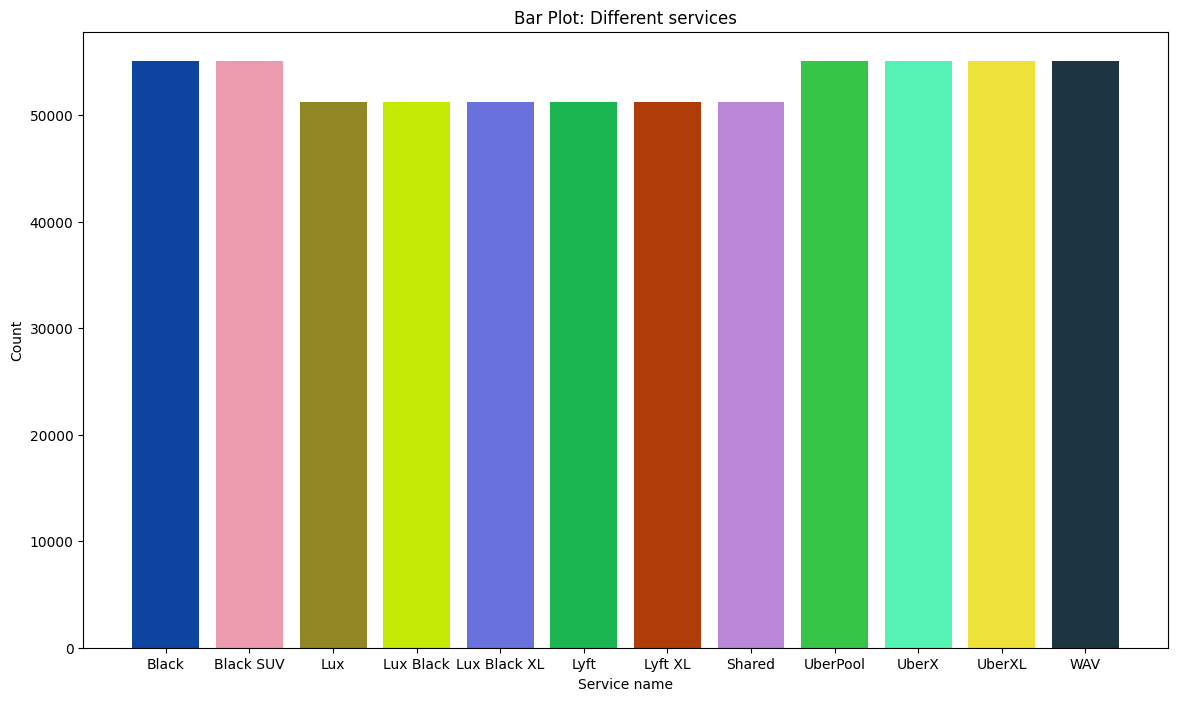

In [ ]:
plt.figure(figsize=(14, 8))
colors = [(random.random(), random.random(), random.random()) for _ in range(len(unique_class))]

plt.bar(unique_class, counts,color=colors)

plt.xlabel('Service name')
plt.ylabel('Count')
plt.title('Bar Plot: Different services')

The above graph shows number of data present in that particular car type.

In [ ]:
# Extrating the required features
rides = ride_clean[(ride_clean['name']=='Lyft')|(ride_clean['name']=='UberX')]
unique_class, counts = np.unique(rides["name"], return_counts=True)
unique_class

array(['Lyft', 'UberX'], dtype=object)

Text(0.5, 1.0, 'Bar Plot: Different services')

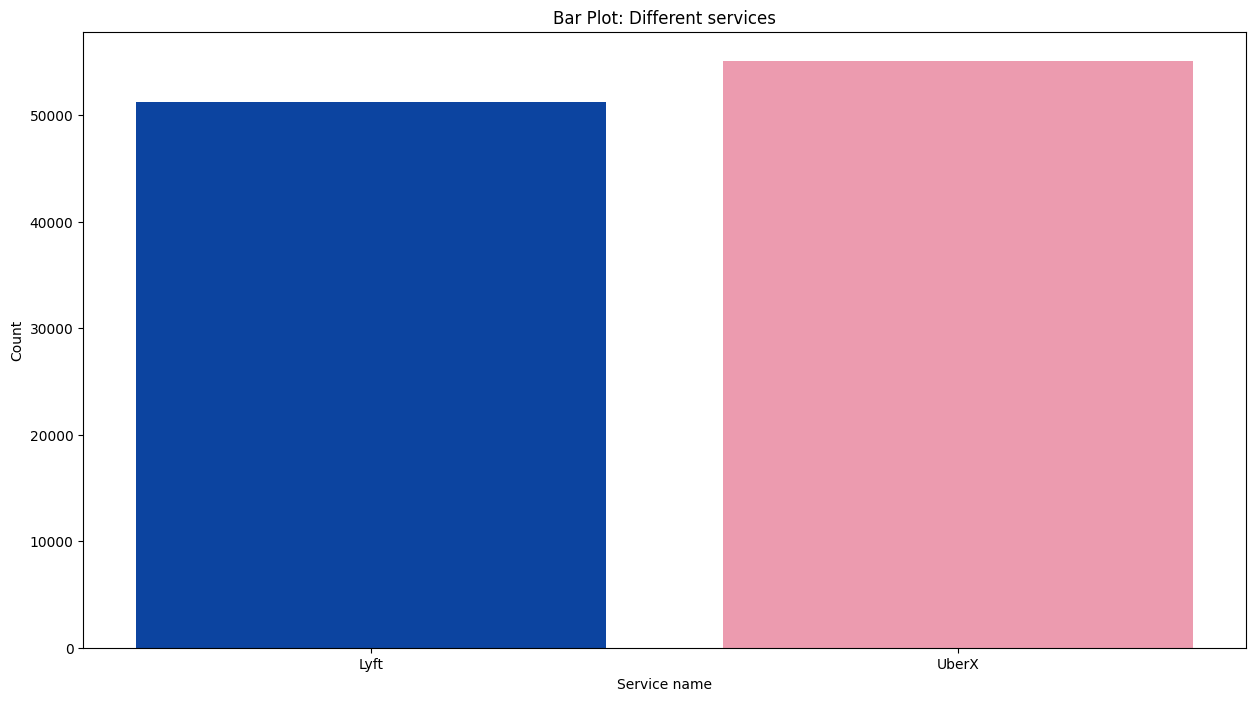

In [ ]:
plt.figure(figsize=(15, 8))
plt.bar(unique_class, counts, color=colors)

plt.xlabel('Service name')
plt.ylabel('Count')
plt.title('Bar Plot: Different services')

Out of all the car types, we require only lyft and uberX, so we extrated the required data.

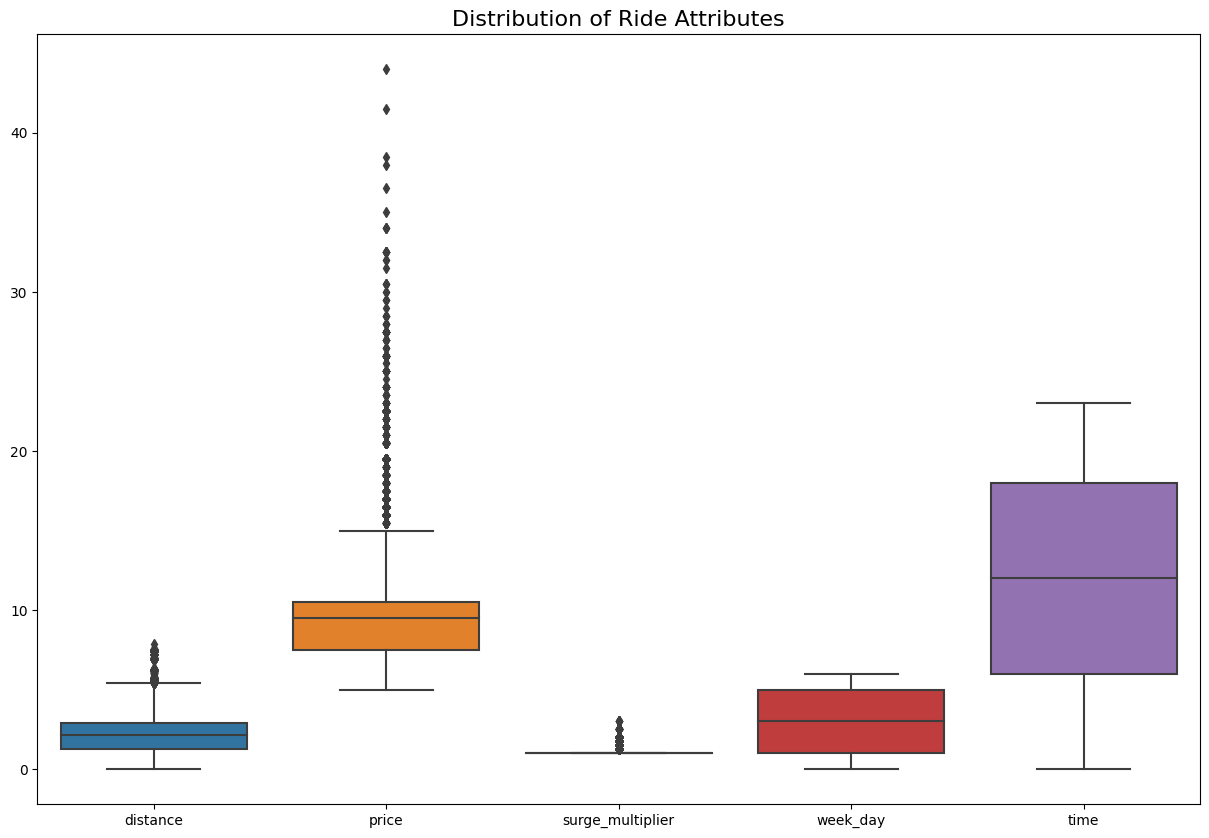

In [ ]:
# Plotting Boxplot to easily find the outliers
columns = ["distance", "price", "surge_multiplier", "week_day", "time"]
plt.figure(figsize=(15, 10))
sns.boxplot(data=rides[columns])
plt.title('Distribution of Ride Attributes', fontsize=16)
plt.show()

All the outliers are clearly visible.

In [ ]:
# Grouping Dataframes
grouped_rides = rides.groupby('name')
uber = grouped_rides.get_group('UberX')
lyft = grouped_rides.get_group('Lyft')

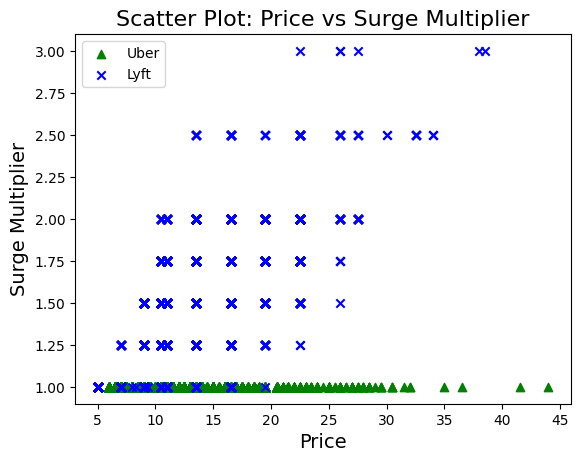

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(uber['price'], uber['surge_multiplier'], c="green", marker="^", label='Uber')
plt.scatter(lyft['price'], lyft['surge_multiplier'], c="blue", marker="x", label='Lyft')

plt.xlabel('Price', fontsize=14)
plt.ylabel('Surge Multiplier', fontsize=14)
plt.title('Scatter Plot: Price vs Surge Multiplier', fontsize=16)

plt.legend()  # Add legend with labels specified in the scatter plots

plt.show()


The surge multiplier is not very much in uber (its constant) but for lyft the surge multiplier is impactful.

In [ ]:
unique_class, counts = np.unique(rides["destination"], return_counts=True)
unique_class

array(['Back Bay', 'Beacon Hill', 'Boston University', 'Fenway',
       'Financial District', 'Haymarket Square', 'North End',
       'North Station', 'Northeastern University', 'South Station',
       'Theatre District', 'West End'], dtype=object)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Back Bay'),
  Text(1, 0, 'Beacon Hill'),
  Text(2, 0, 'Boston University'),
  Text(3, 0, 'Fenway'),
  Text(4, 0, 'Financial District'),
  Text(5, 0, 'Haymarket Square'),
  Text(6, 0, 'North End'),
  Text(7, 0, 'North Station'),
  Text(8, 0, 'Northeastern University'),
  Text(9, 0, 'South Station'),
  Text(10, 0, 'Theatre District'),
  Text(11, 0, 'West End')])

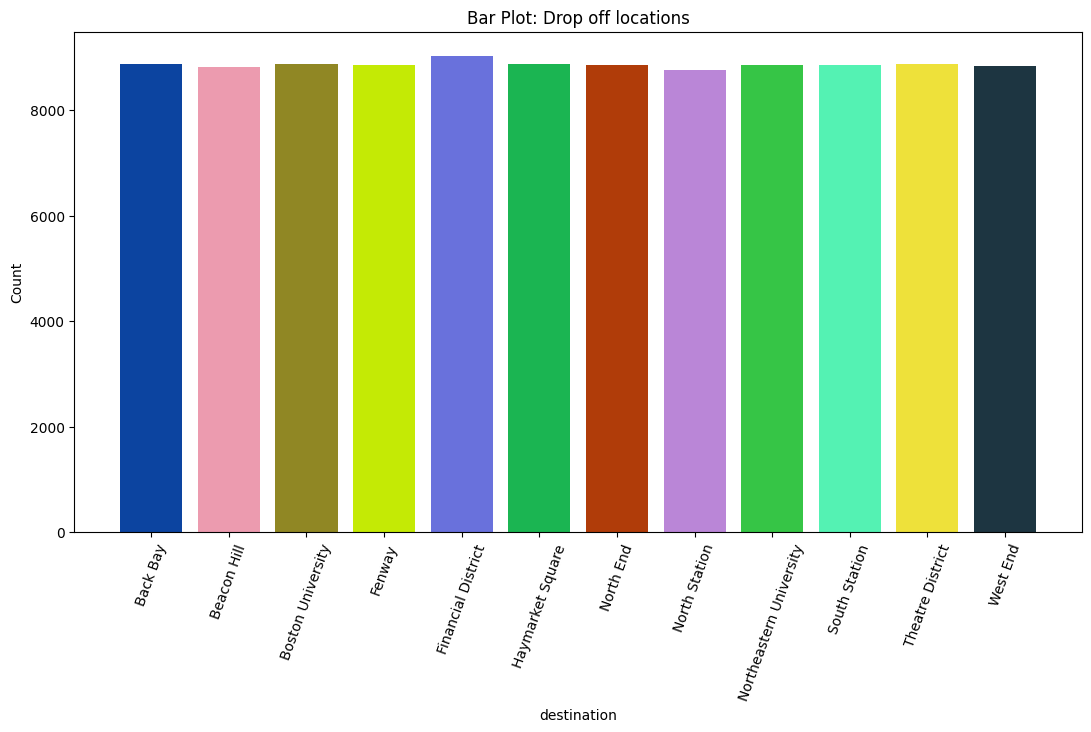

In [ ]:
plt.figure(figsize=(13, 6.5))
plt.bar(unique_class, counts, color=colors)

plt.xlabel('destination')
plt.ylabel('Count')
plt.title('Bar Plot: Drop off locations')
plt.xticks(rotation=70)

It shows the count for users with particular destinations.

In [ ]:
unique_class, counts = np.unique(rides["source"], return_counts=True)
unique_class

array(['Back Bay', 'Beacon Hill', 'Boston University', 'Fenway',
       'Financial District', 'Haymarket Square', 'North End',
       'North Station', 'Northeastern University', 'South Station',
       'Theatre District', 'West End'], dtype=object)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Back Bay'),
  Text(1, 0, 'Beacon Hill'),
  Text(2, 0, 'Boston University'),
  Text(3, 0, 'Fenway'),
  Text(4, 0, 'Financial District'),
  Text(5, 0, 'Haymarket Square'),
  Text(6, 0, 'North End'),
  Text(7, 0, 'North Station'),
  Text(8, 0, 'Northeastern University'),
  Text(9, 0, 'South Station'),
  Text(10, 0, 'Theatre District'),
  Text(11, 0, 'West End')])

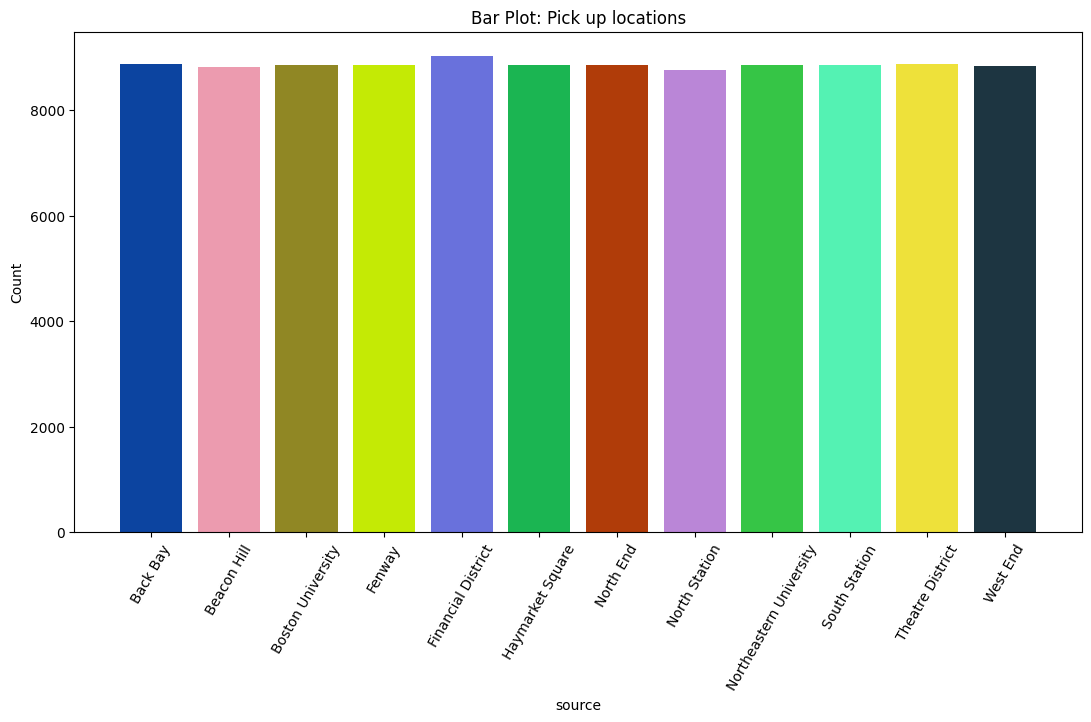

In [ ]:
plt.figure(figsize=(13, 6.5))
plt.bar(unique_class, counts, color=colors)
#lt.rc('font', size=10)
plt.xlabel('source')
plt.ylabel('Count')
plt.title('Bar Plot: Pick up locations')
plt.xticks(rotation=60)

It shows the count for users with particular pick up locations
.

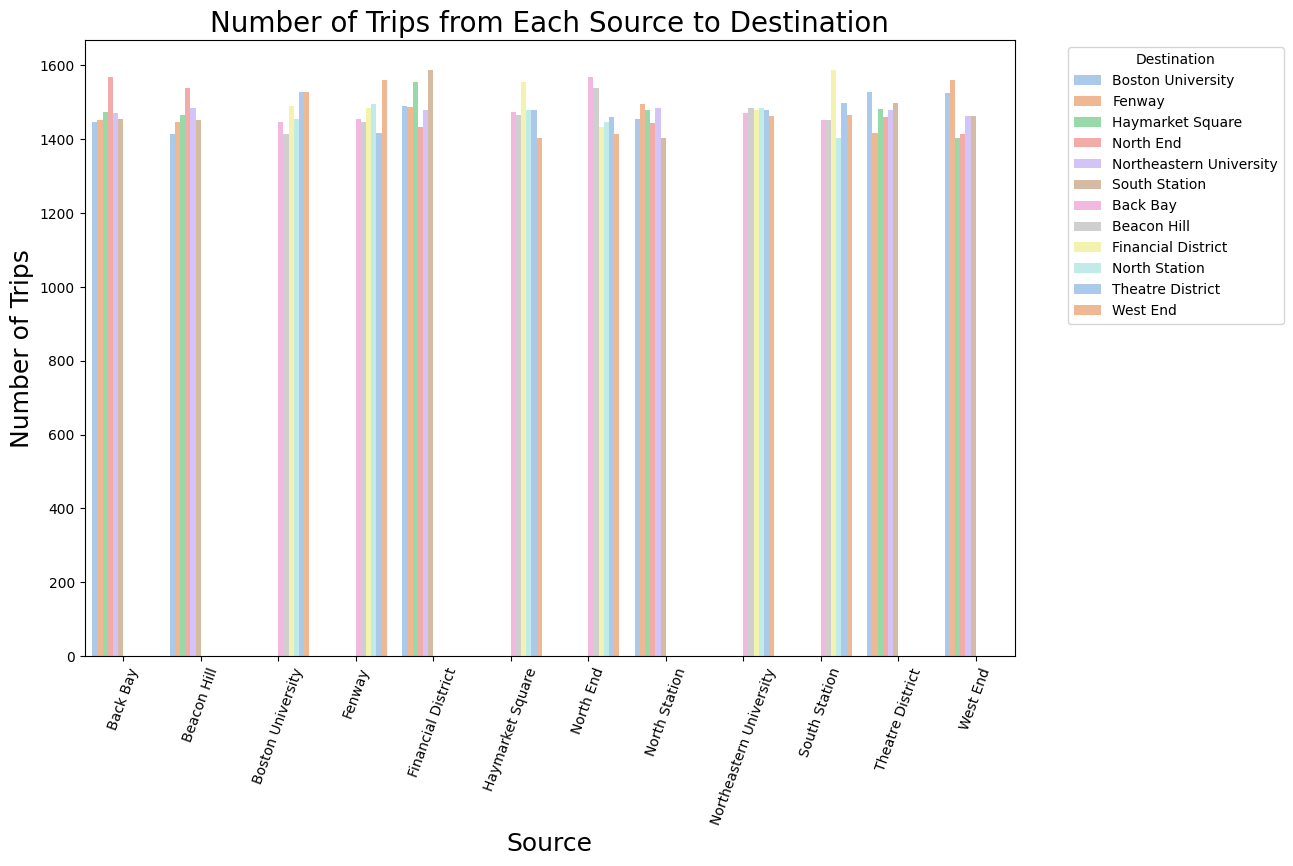

In [ ]:
source_destination_counts = rides.groupby(['source', 'destination']).size().reset_index(name='count')

custom_palette = sns.color_palette("pastel", n_colors=len(source_destination_counts['destination'].unique()))

plt.figure(figsize=(12, 8))

sns.barplot(x='source', y='count', hue='destination', data=source_destination_counts, palette=custom_palette, width=0.8)

plt.xlabel('Source', fontsize=18)
plt.ylabel('Number of Trips', fontsize=18)
plt.title('Number of Trips from Each Source to Destination', fontsize=20)
plt.xticks(rotation=70)
plt.legend(title='Destination', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

It shows the count/number of trips from a particular source to destination.

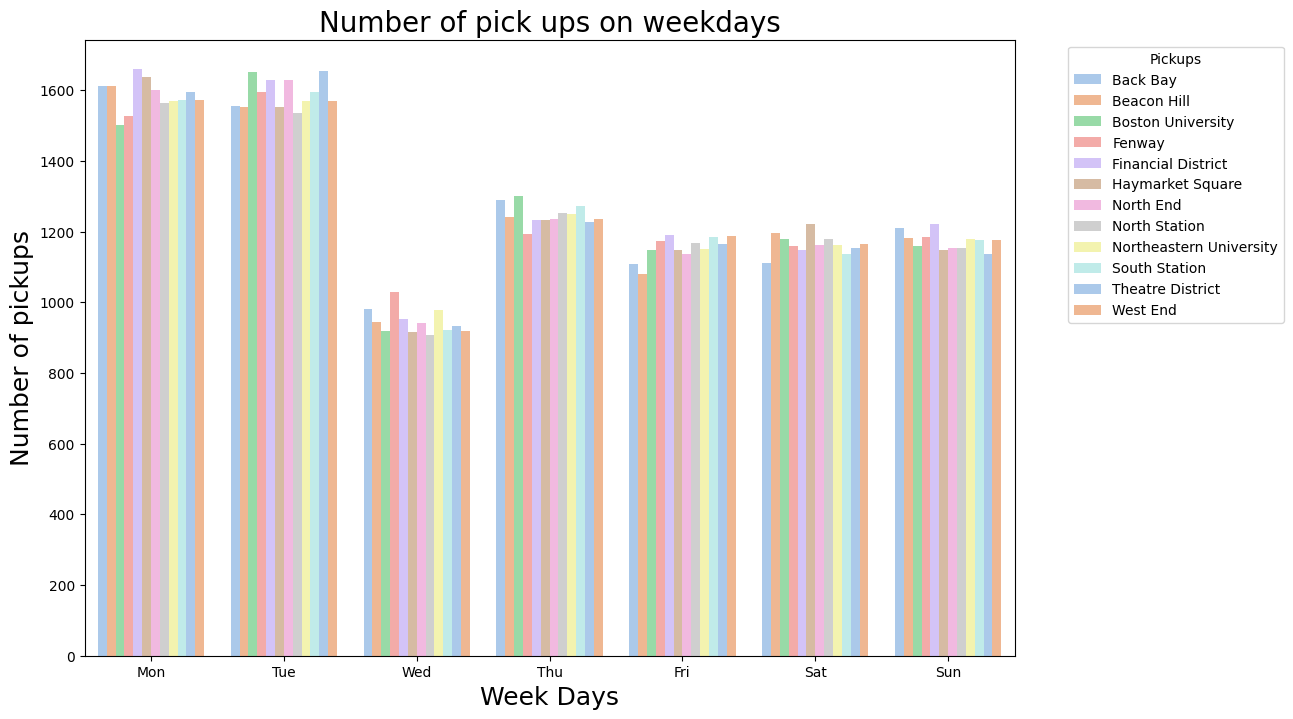

In [ ]:
pickup_on_weekdays = rides.groupby(['week_day', 'source']).size().reset_index(name='count')

custom_palette = sns.color_palette("pastel", n_colors=len(pickup_on_weekdays['source'].unique()))

plt.figure(figsize=(12, 8))

sns.barplot(x='week_day', y='count', hue='source', data=pickup_on_weekdays, palette=custom_palette, width=0.8)

plt.xlabel('Week Days', fontsize=18)
plt.ylabel('Number of pickups', fontsize=18)
plt.title('Number of pick ups on weekdays', fontsize=20)
# plt.xticks(rotation=45)
days_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun']
plt.xticks(ticks=range(7), labels=days_of_week, rotation=0)
plt.legend(title='Pickups', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

This shows that there are less number of trips on wednesday and more number of pickup on monday and tuesday.

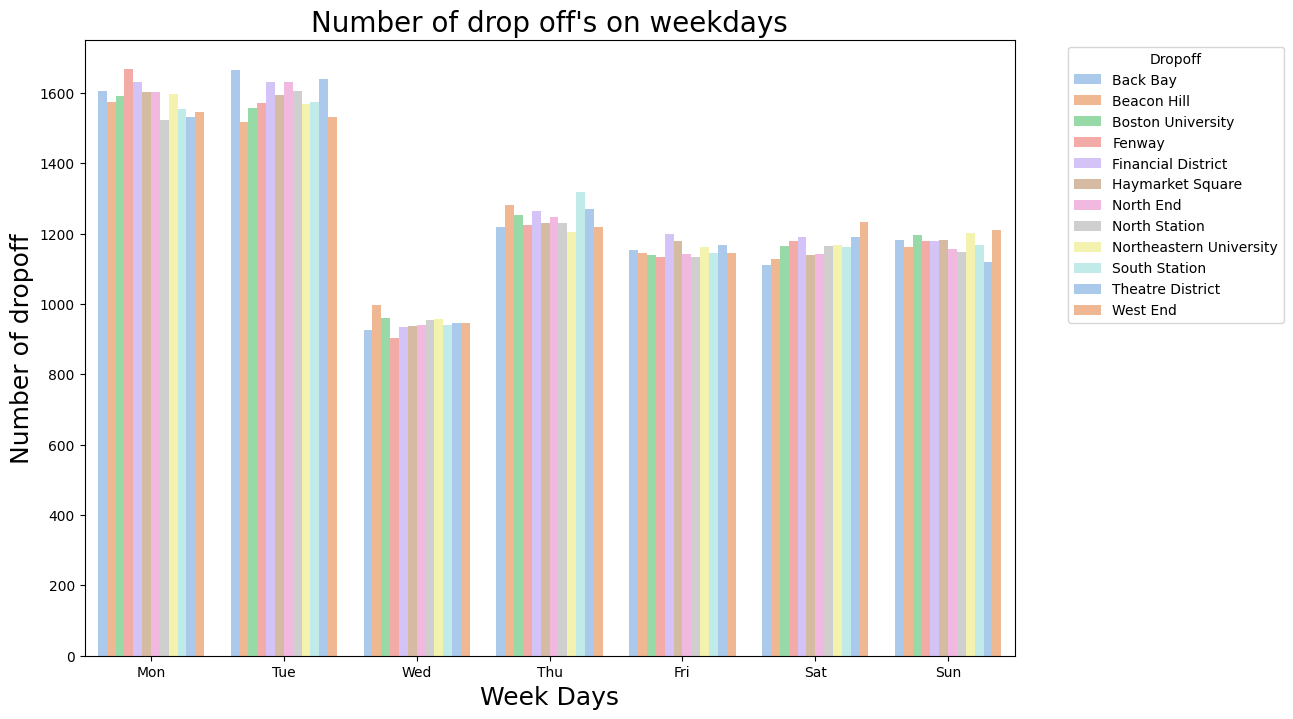

In [ ]:
dropoff_on_weekdays = rides.groupby(['week_day', 'destination']).size().reset_index(name='count')

custom_palette = sns.color_palette("pastel", n_colors=len(dropoff_on_weekdays['destination'].unique()))

plt.figure(figsize=(12, 8))

sns.barplot(x='week_day', y='count', hue='destination', data=dropoff_on_weekdays, palette=custom_palette, width=0.8)

plt.xlabel('Week Days', fontsize=18)
plt.ylabel('Number of dropoff', fontsize=18)
plt.title("Number of drop off's on weekdays", fontsize=20)
# plt.xticks(rotation=45)
days_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun']
plt.xticks(ticks=range(7), labels=days_of_week, rotation=0)
plt.legend(title='Dropoff', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

This shows that there are less number of trips on wednesday and more number of drop off's on monday and tuesday.

In [ ]:
source_dest_weekday_counts = rides.groupby(['source', 'destination', 'week_day']).size().reset_index(name='count')
source_dest_weekday_counts

source        destination  week_day  count
0    Back Bay  Boston University         0    285
1    Back Bay  Boston University         1    227
2    Back Bay  Boston University         2    171
3    Back Bay  Boston University         3    222
4    Back Bay  Boston University         4    185
..        ...                ...       ...    ...
499  West End      South Station         2    141
500  West End      South Station         3    214
501  West End      South Station         4    201
502  West End      South Station         5    204
503  West End      South Station         6    193

[504 rows x 4 columns]

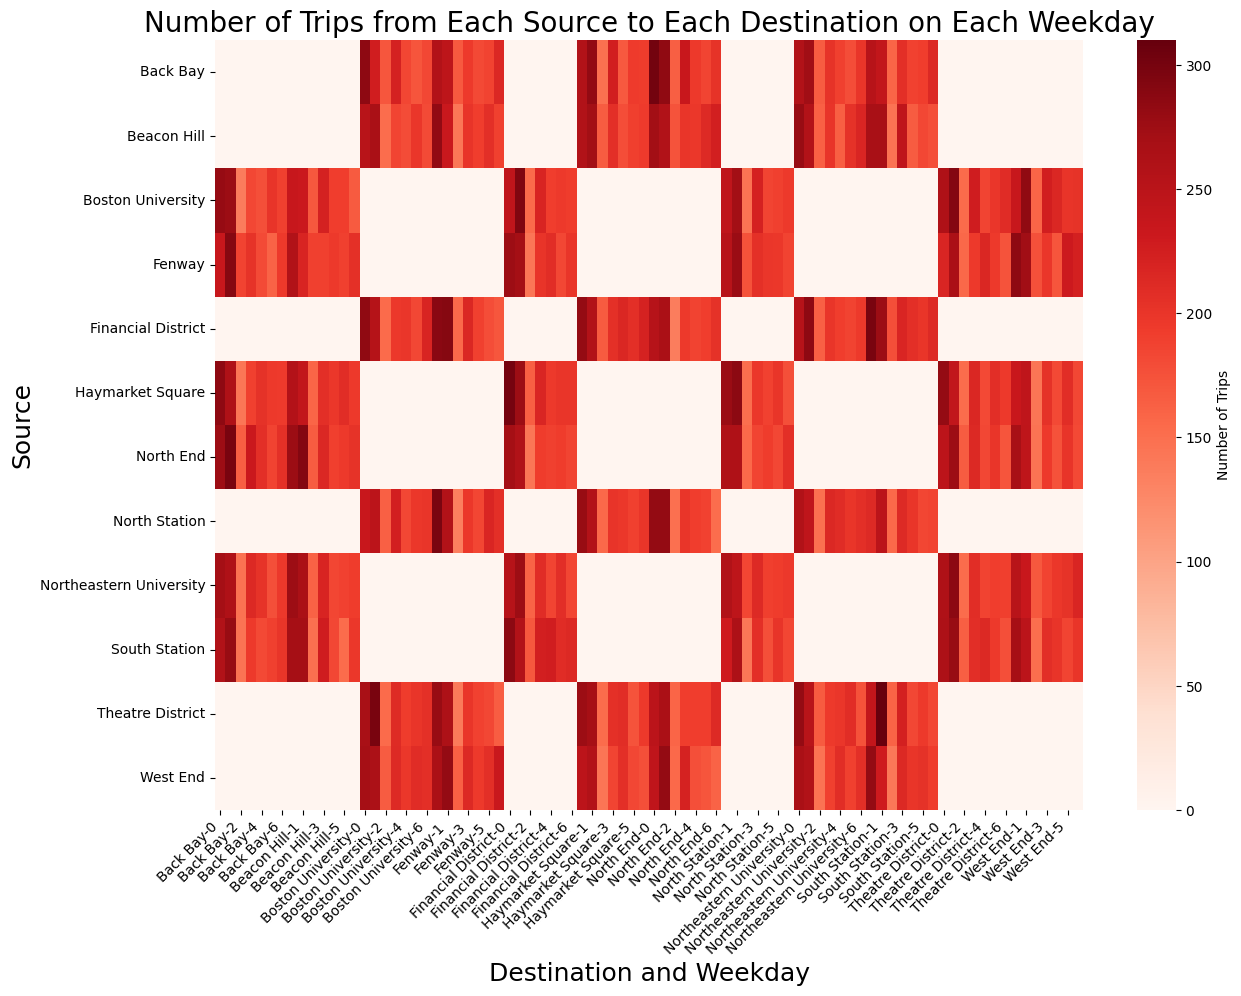

In [ ]:


heatmap_data = source_dest_weekday_counts.pivot_table(index='source', columns=['destination', 'week_day'], values='count', fill_value=0)

plt.figure(figsize=(14, 10))

sns.heatmap(heatmap_data, annot=False, cmap="Reds", fmt='g', annot_kws={"size": 10}, cbar_kws={'label': 'Number of Trips'})

plt.xlabel('Destination and Weekday', fontsize=18)
plt.ylabel('Source', fontsize=18)
plt.title('Number of Trips from Each Source to Each Destination on Each Weekday', fontsize=20)
plt.xticks(rotation=45, ha='right')


plt.show()

In [ ]:
source_dest_weekday_counts = uber.groupby(['source', 'destination', 'week_day']).size().reset_index(name='count')
source_dest_weekday_counts

source        destination  week_day  count
0    Back Bay  Boston University         0    143
1    Back Bay  Boston University         1    112
2    Back Bay  Boston University         2     83
3    Back Bay  Boston University         3    126
4    Back Bay  Boston University         4     88
..        ...                ...       ...    ...
499  West End      South Station         2     70
500  West End      South Station         3    106
501  West End      South Station         4     99
502  West End      South Station         5    105
503  West End      South Station         6    114

[504 rows x 4 columns]

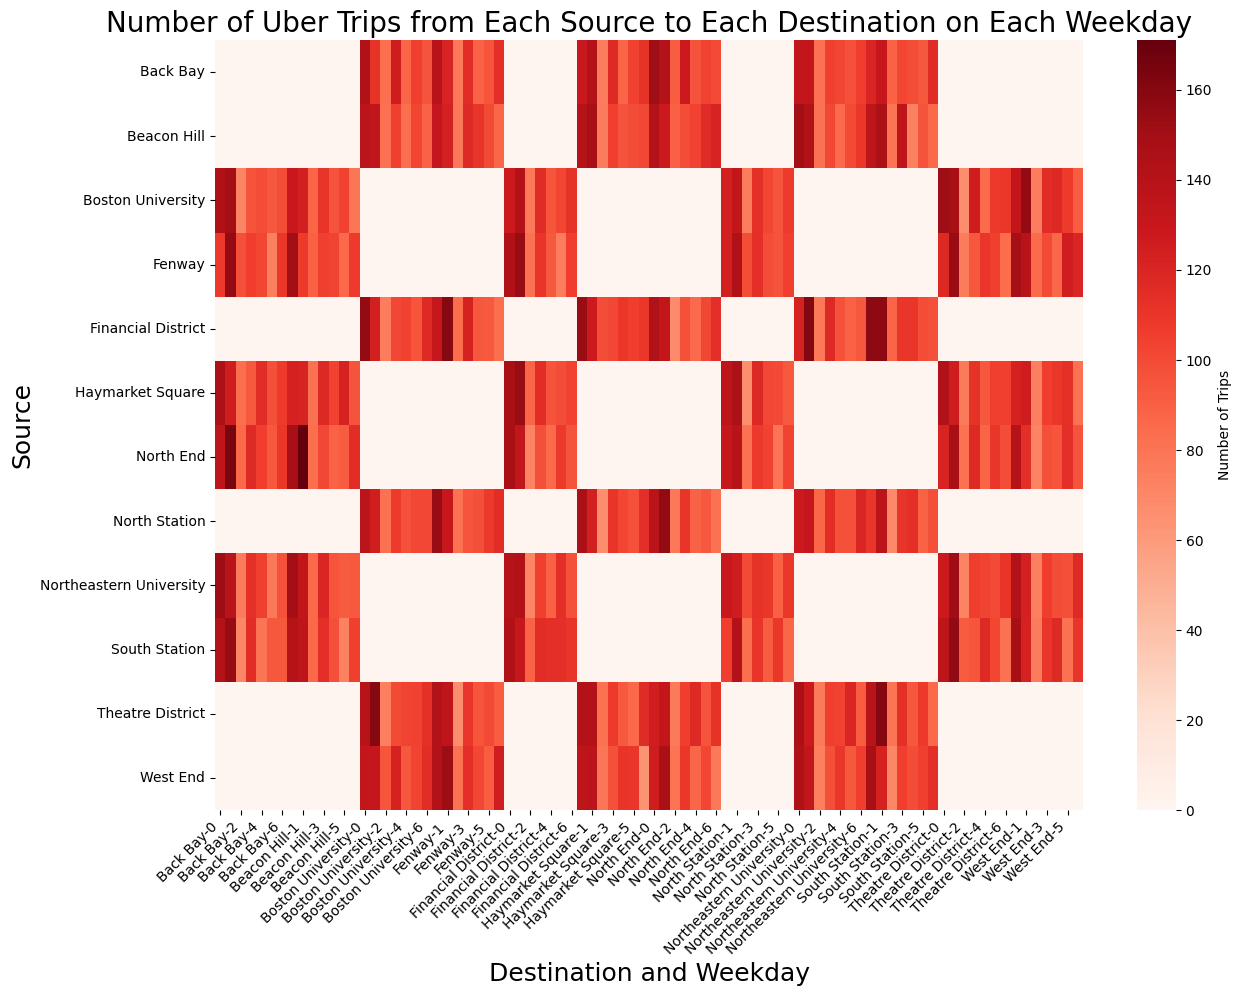

In [ ]:


heatmap_data = source_dest_weekday_counts.pivot_table(index='source', columns=['destination', 'week_day'], values='count', fill_value=0)

plt.figure(figsize=(14, 10))

sns.heatmap(heatmap_data, annot=False, cmap="Reds", fmt='g', annot_kws={"size": 10}, cbar_kws={'label': 'Number of Trips'})

plt.xlabel('Destination and Weekday', fontsize=18)
plt.ylabel('Source', fontsize=18)
plt.title('Number of Uber Trips from Each Source to Each Destination on Each Weekday', fontsize=20)
plt.xticks(rotation=45, ha='right')

plt.show()

In [ ]:
source_dest_weekday_counts = lyft.groupby(['source', 'destination', 'week_day']).size().reset_index(name='count')
source_dest_weekday_counts

source        destination  week_day  count
0    Back Bay  Boston University         0    142
1    Back Bay  Boston University         1    115
2    Back Bay  Boston University         2     88
3    Back Bay  Boston University         3     96
4    Back Bay  Boston University         4     97
..        ...                ...       ...    ...
499  West End      South Station         2     71
500  West End      South Station         3    108
501  West End      South Station         4    102
502  West End      South Station         5     99
503  West End      South Station         6     79

[504 rows x 4 columns]

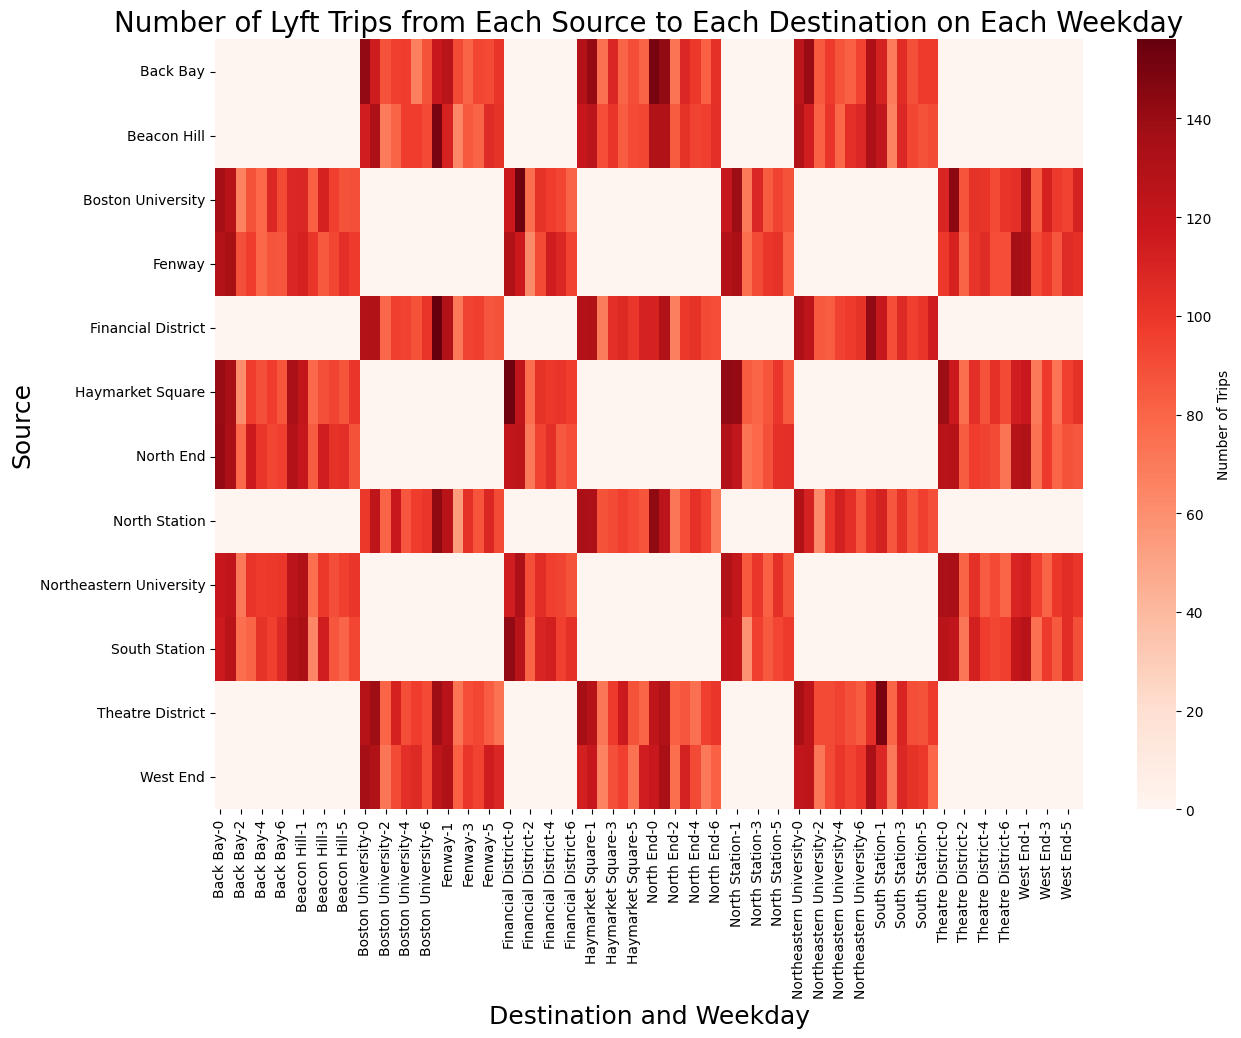

In [ ]:


heatmap_data = source_dest_weekday_counts.pivot_table(index='source', columns=['destination', 'week_day'], values='count', fill_value=0)

plt.figure(figsize=(14, 10))

sns.heatmap(heatmap_data, annot=False, cmap="Reds", fmt='g', annot_kws={"size": 10}, cbar_kws={'label': 'Number of Trips'})

plt.xlabel('Destination and Weekday', fontsize=18)
plt.ylabel('Source', fontsize=18)
plt.title('Number of Lyft Trips from Each Source to Each Destination on Each Weekday', fontsize=20)

plt.show()

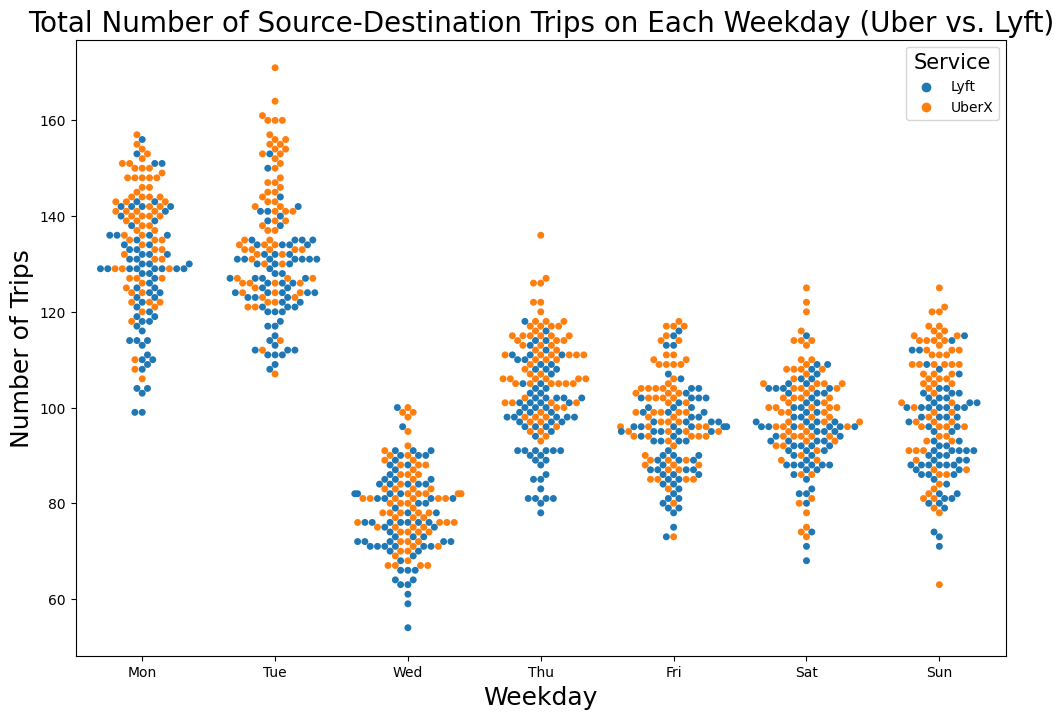

In [ ]:
import warnings

source_dest_service_weekday_counts = rides.groupby(['source', 'destination', 'name', 'week_day']).size().reset_index(name='count')

plt.figure(figsize=(12, 8))

sns.swarmplot(x='week_day', y='count', hue='name', data=source_dest_service_weekday_counts, size=5)

plt.xlabel('Weekday', fontsize=18)
plt.ylabel('Number of Trips', fontsize=18)
plt.xticks(ticks=range(7), labels=days_of_week, rotation=0)
plt.title('Total Number of Source-Destination Trips on Each Weekday (Uber vs. Lyft)', fontsize=20)

plt.legend(title='Service', title_fontsize='15')
warnings.filterwarnings("ignore")

plt.show()



It clearly shows the number of trips for uber and lyft separately for week days.

In [ ]:
source_counts = rides.groupby(['name', 'week_day', 'source']).size().reset_index(name='count')
destination_counts = rides.groupby(['name', 'week_day', 'destination']).size().reset_index(name='count')

print(source_counts.head)
print(destination_counts.head)

<bound method NDFrame.head of       name  week_day                   source  count
0     Lyft         0                 Back Bay    797
1     Lyft         0              Beacon Hill    775
2     Lyft         0        Boston University    695
3     Lyft         0                   Fenway    733
4     Lyft         0       Financial District    799
..     ...       ...                      ...    ...
163  UberX         6            North Station    629
164  UberX         6  Northeastern University    624
165  UberX         6            South Station    589
166  UberX         6         Theatre District    609
167  UberX         6                 West End    601

[168 rows x 4 columns]>
<bound method NDFrame.head of       name  week_day              destination  count
0     Lyft         0                 Back Bay    781
1     Lyft         0              Beacon Hill    734
2     Lyft         0        Boston University    748
3     Lyft         0                   Fenway    830
4     Lyft    

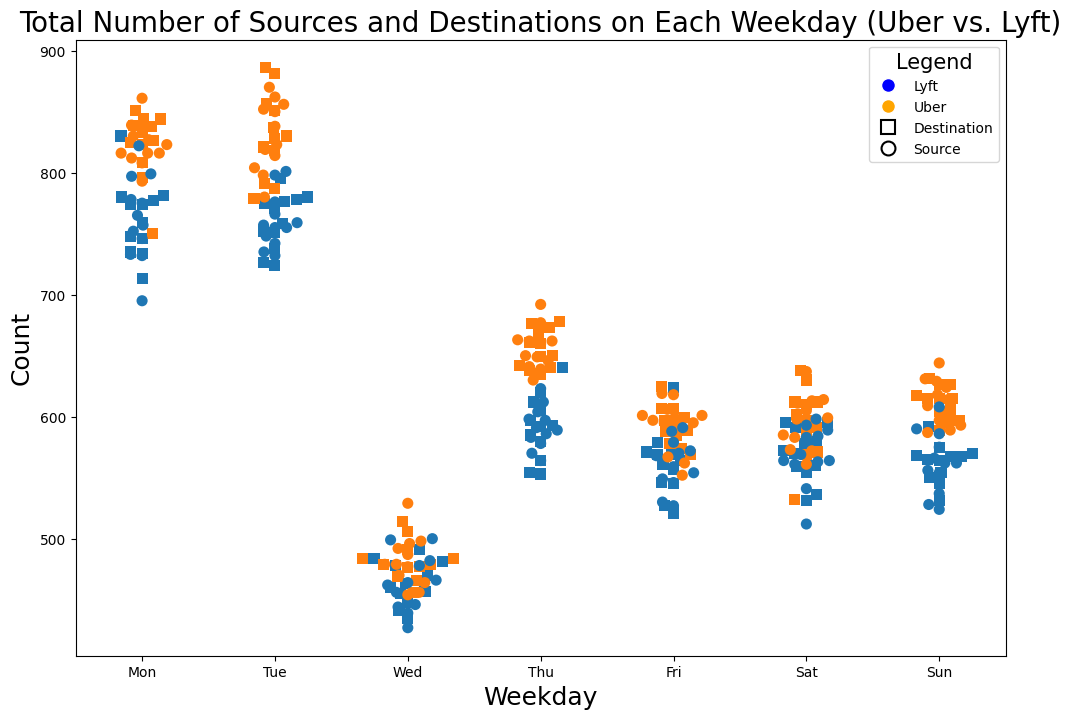

In [ ]:
plt.figure(figsize=(12, 8))

# Create a dot plot using seaborn's swarmplot for destination
sns.swarmplot(x='week_day', y='count', hue='name', data=destination_counts, size=8, marker='s', label='Destination')

# Create a dot plot using seaborn's swarmplot for source
sns.swarmplot(x='week_day', y='count', hue='name', data=source_counts, size=8, marker='o', label='Source')

# Set labels and title
plt.xlabel('Weekday', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(ticks=range(7), labels=days_of_week, rotation=0)
plt.title('Total Number of Sources and Destinations on Each Weekday (Uber vs. Lyft)', fontsize=20)

# Show the legend
custom_legend = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Lyft'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Uber'),
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='white', markersize=10, label='Destination', markeredgewidth=1.5, markeredgecolor='black'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='white', markersize=10, label='Source', markeredgewidth=1.5, markeredgecolor='black')
]
plt.legend(handles=custom_legend, title='Legend', title_fontsize='15')

# Show the plot
plt.show()

This shows rides for lyft, uber and also pick up and drop of locations separately.

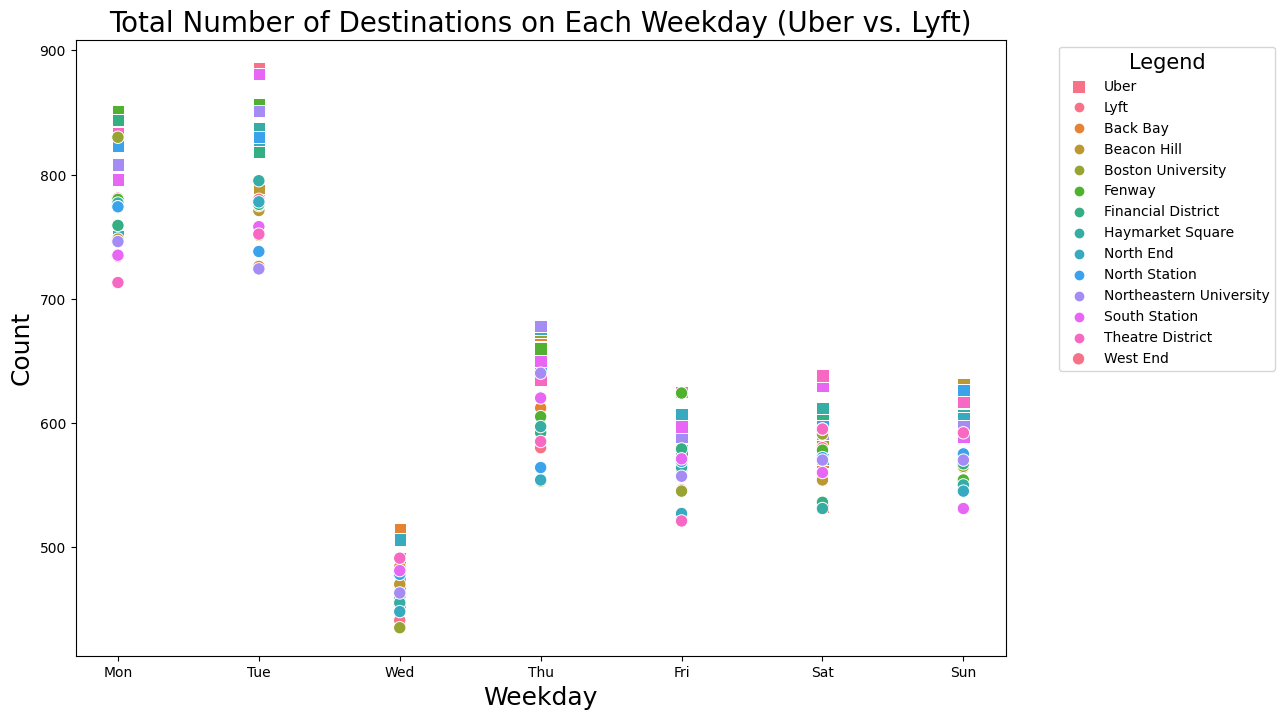

In [ ]:
plt.figure(figsize=(12, 8))

custom_palette = sns.color_palette("dark", n_colors=len(destination_counts['destination'].unique()))

sns.scatterplot(x='week_day', y='count', hue='destination', data=destination_counts[destination_counts['name'] == 'UberX'], s=80, marker='s', label='Uber')

sns.scatterplot(x='week_day', y='count', hue='destination', data=destination_counts[destination_counts['name'] == 'Lyft'], s=80, marker='o', label='Lyft')

plt.xlabel('Weekday', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(ticks=range(7), labels=days_of_week, rotation=0)
plt.title('Total Number of Destinations on Each Weekday (Uber vs. Lyft)', fontsize=20)


legend_labels = ["Uber", "Lyft"] + list(destination_counts['destination'].unique())
plt.legend(title='Legend', title_fontsize='15', bbox_to_anchor=(1.05, 1), loc='upper left', labels=legend_labels)

plt.show()

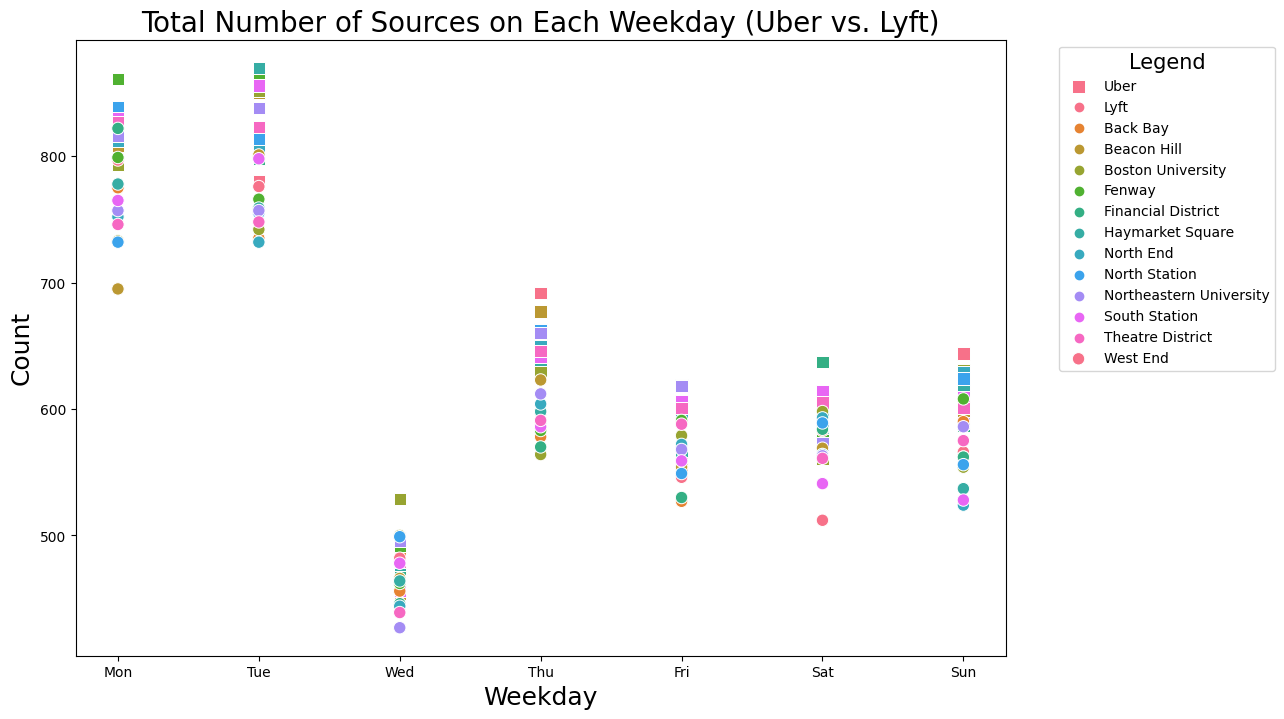

In [ ]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x='week_day', y='count', hue='source', data=source_counts[source_counts['name'] == 'UberX'], s=80, marker='s', label='Uber')

sns.scatterplot(x='week_day', y='count', hue='source', data=source_counts[source_counts['name'] == 'Lyft'], s=80, marker='o', label='Lyft')

plt.xlabel('Weekday', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(ticks=range(7), labels=days_of_week, rotation=0)
plt.title('Total Number of Sources on Each Weekday (Uber vs. Lyft)', fontsize=20)


legend_labels = ["Uber", "Lyft"] + list(source_counts['source'].unique())
plt.legend(title='Legend', title_fontsize='15', bbox_to_anchor=(1.05, 1), loc='upper left', labels=legend_labels)

plt.show()

In [ ]:
def no_of_rides_weekdays(source_uber, source_lyft, name):
  rides_per_weekday_uber = source_uber['week_day'].value_counts().sort_index()
  rides_per_weekday_lyft = source_lyft['week_day'].value_counts().sort_index()

  plt.figure(figsize=(10, 6))

  sns.lineplot(x=rides_per_weekday_uber.index, y=rides_per_weekday_uber.values, marker='o', label='Uber')

  sns.lineplot(x=rides_per_weekday_lyft.index, y=rides_per_weekday_lyft.values, marker='o', label='Lyft')

  plt.xlabel('Weekday', fontsize=14)
  plt.ylabel('Number of Rides', fontsize=14)
  plt.xticks(ticks=range(7), labels=days_of_week, rotation=0)
  plt.title('Number of Rides over the Weekdays for '+name+' (Uber vs. Lyft)', fontsize=16)

  plt.legend()

  plt.show()

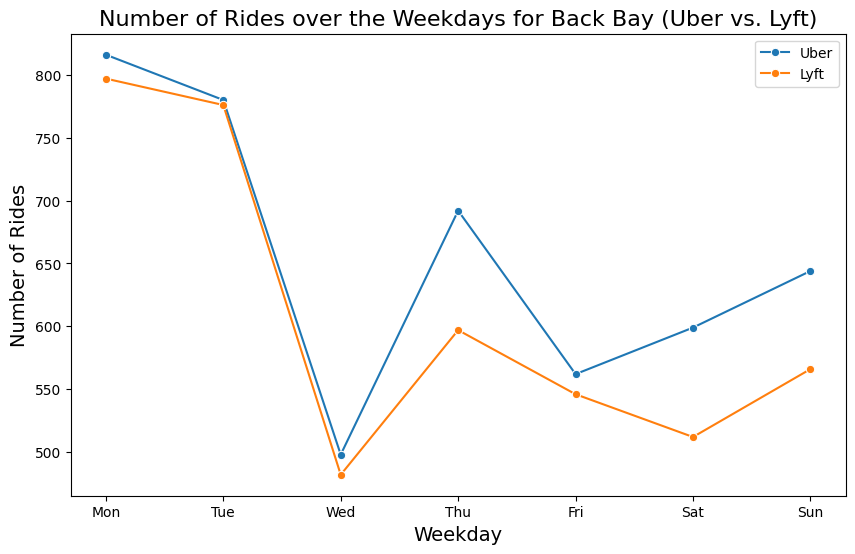

In [ ]:

source_uber = uber[rides['source'] == 'Back Bay']
source_lyft = lyft[rides['source'] == 'Back Bay']

no_of_rides_weekdays(source_uber, source_lyft, 'Back Bay')

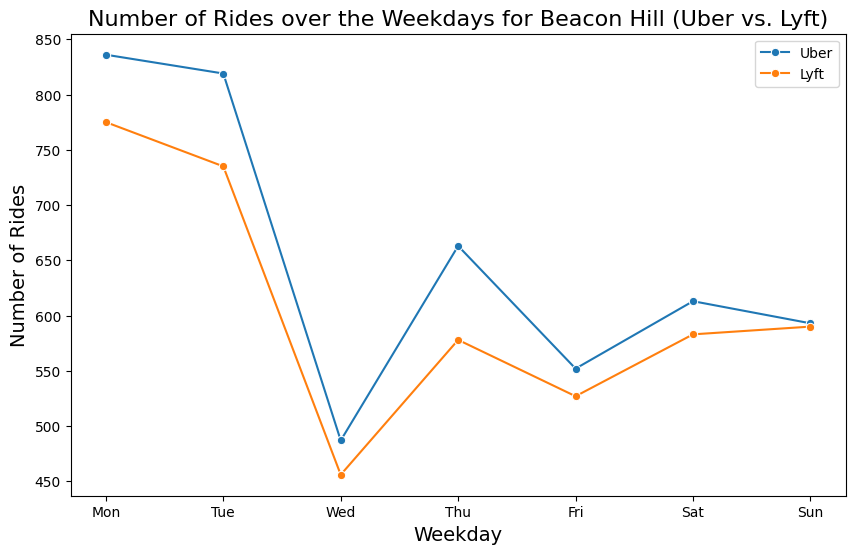

In [ ]:
source_uber = uber[rides['source'] == 'Beacon Hill']
source_lyft = lyft[rides['source'] == 'Beacon Hill']

no_of_rides_weekdays(source_uber, source_lyft, 'Beacon Hill')

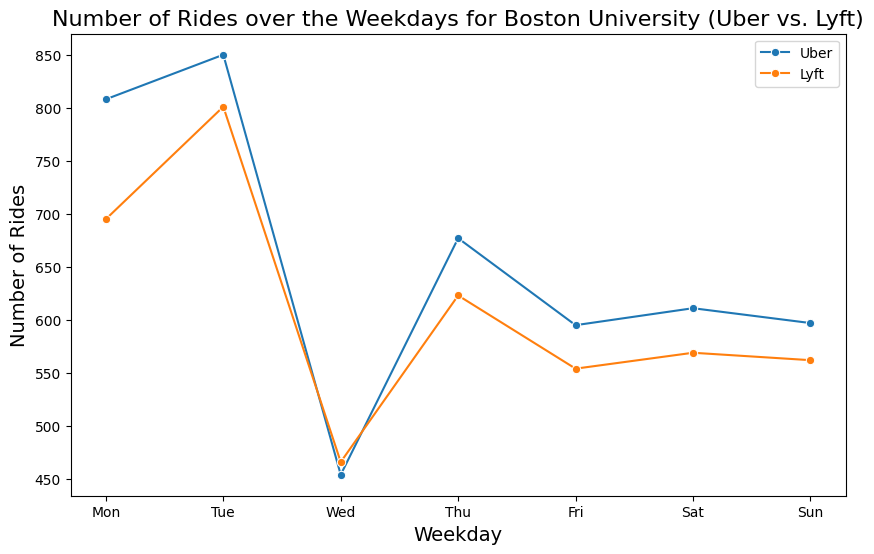

In [ ]:
source_uber = uber[rides['source'] == 'Boston University']
source_lyft = lyft[rides['source'] == 'Boston University']

no_of_rides_weekdays(source_uber, source_lyft, 'Boston University')

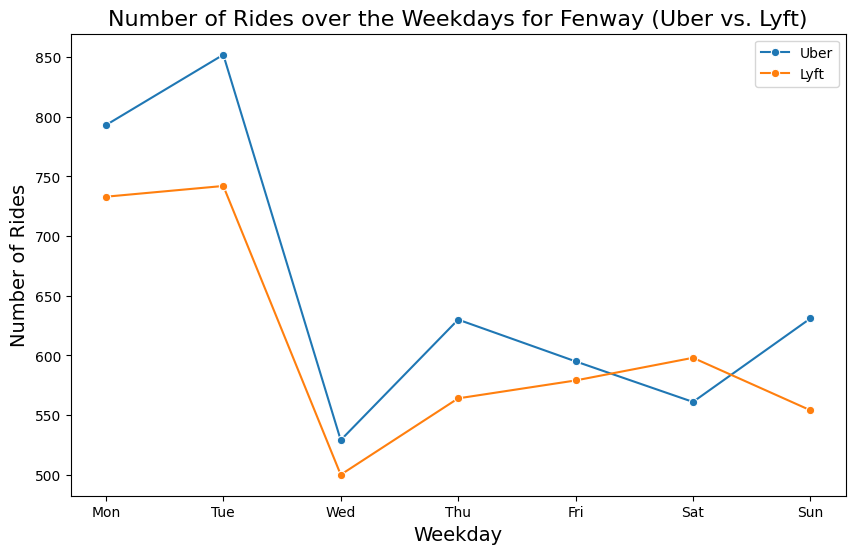

In [ ]:
source_uber = uber[rides['source'] == 'Fenway']
source_lyft = lyft[rides['source'] == 'Fenway']

no_of_rides_weekdays(source_uber, source_lyft, 'Fenway')

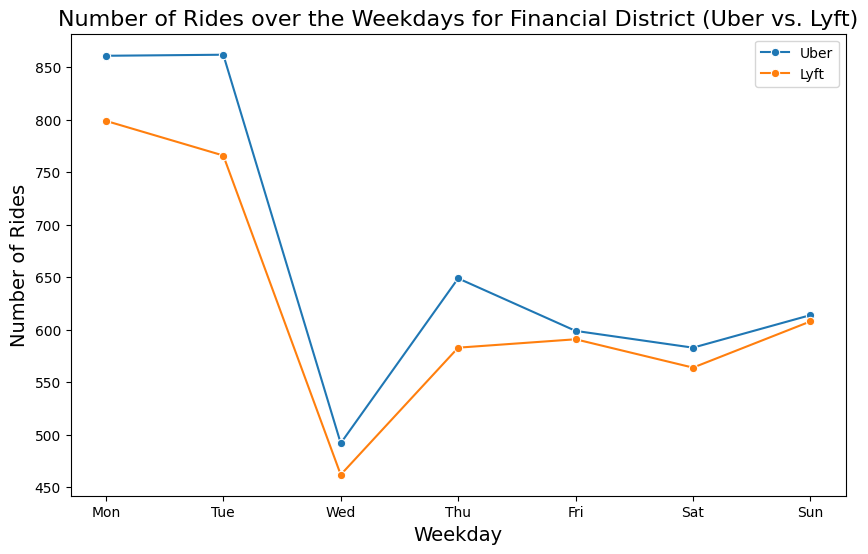

In [ ]:
source_uber = uber[rides['source'] == 'Financial District']
source_lyft = lyft[rides['source'] == 'Financial District']

no_of_rides_weekdays(source_uber, source_lyft, 'Financial District')

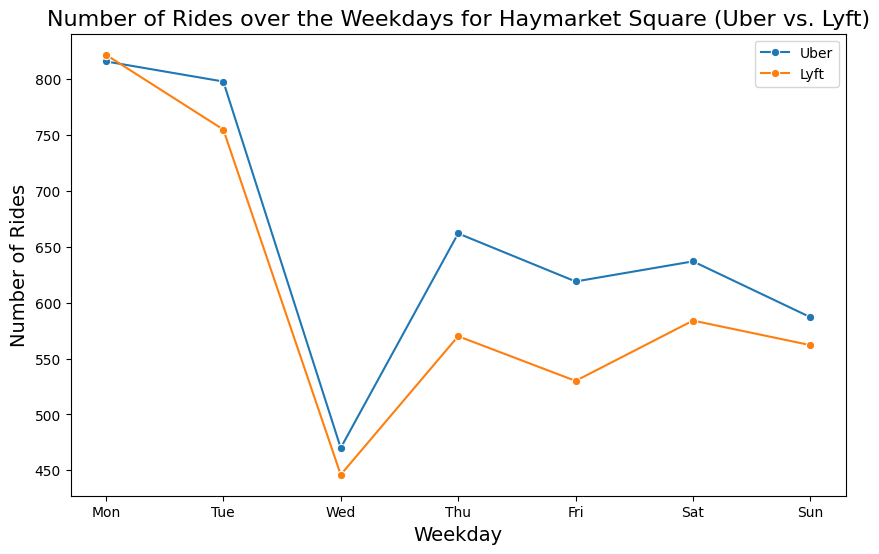

In [ ]:
source_uber = uber[rides['source'] == 'Haymarket Square']
source_lyft = lyft[rides['source'] == 'Haymarket Square']

no_of_rides_weekdays(source_uber, source_lyft, 'Haymarket Square')

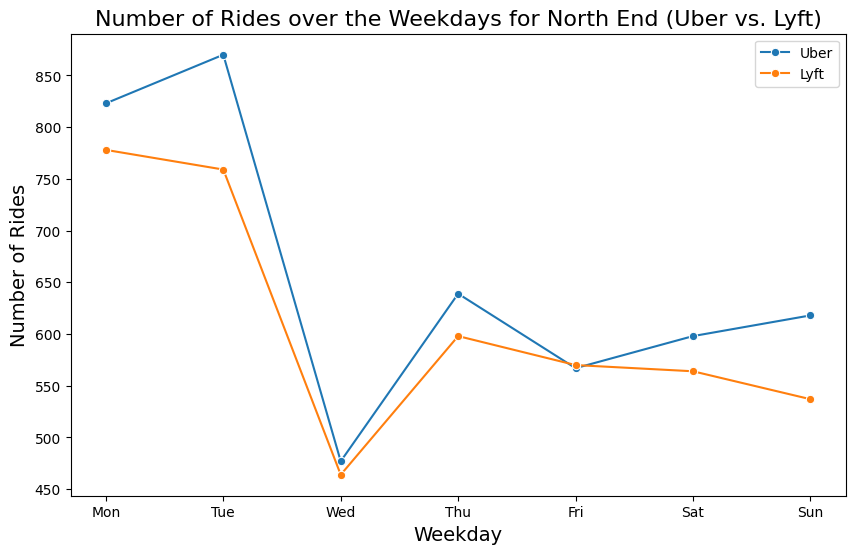

In [ ]:
source_uber = uber[rides['source'] == 'North End']
source_lyft = lyft[rides['source'] == 'North End']

no_of_rides_weekdays(source_uber, source_lyft, 'North End')

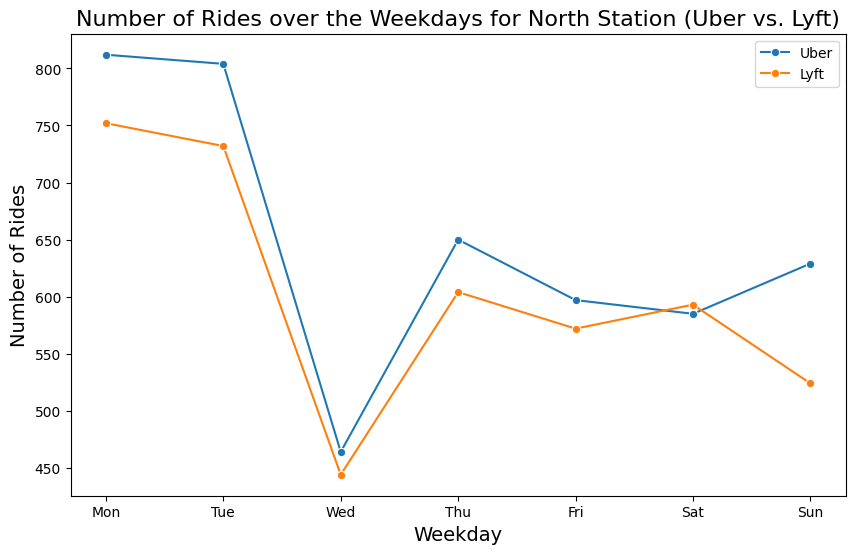

In [ ]:
source_uber = uber[rides['source'] == 'North Station']
source_lyft = lyft[rides['source'] == 'North Station']

no_of_rides_weekdays(source_uber, source_lyft, 'North Station')

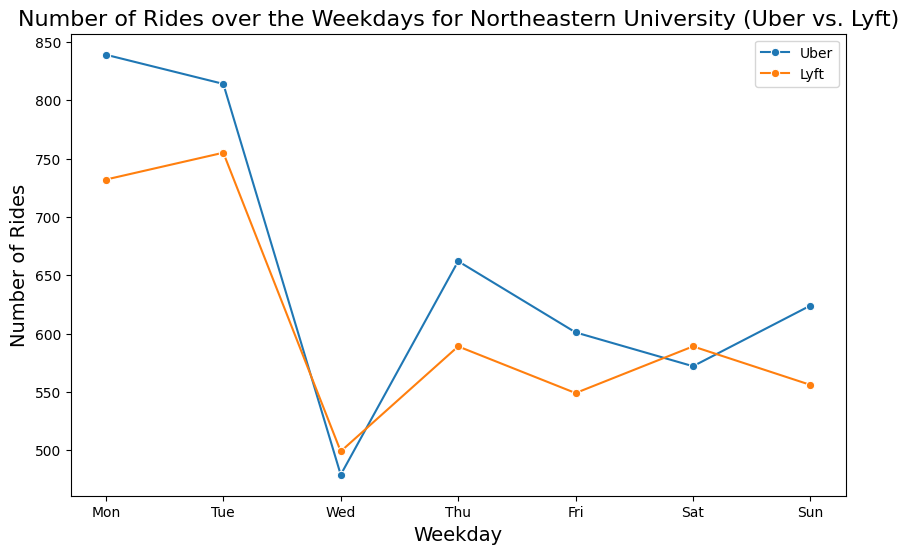

In [ ]:
source_uber = uber[rides['source'] == 'Northeastern University']
source_lyft = lyft[rides['source'] == 'Northeastern University']

no_of_rides_weekdays(source_uber, source_lyft, 'Northeastern University')

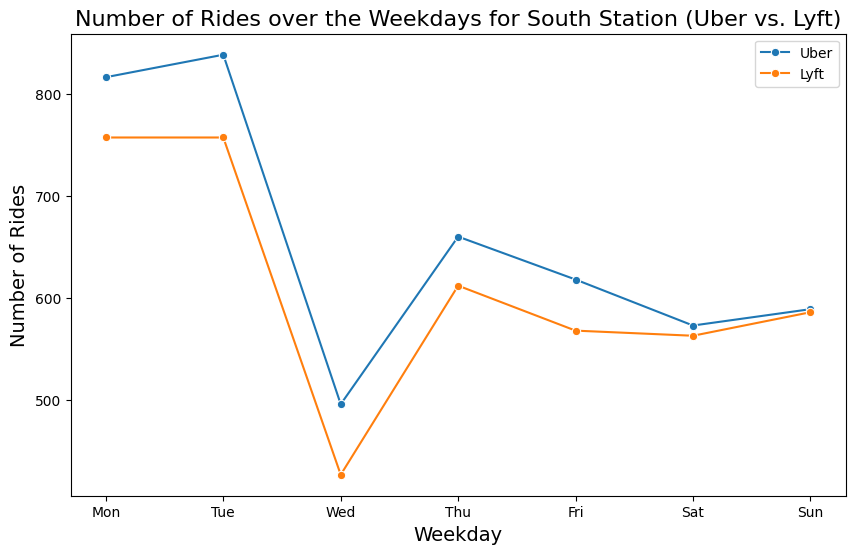

In [ ]:
source_uber = uber[rides['source'] == 'South Station']
source_lyft = lyft[rides['source'] == 'South Station']

no_of_rides_weekdays(source_uber, source_lyft, 'South Station')

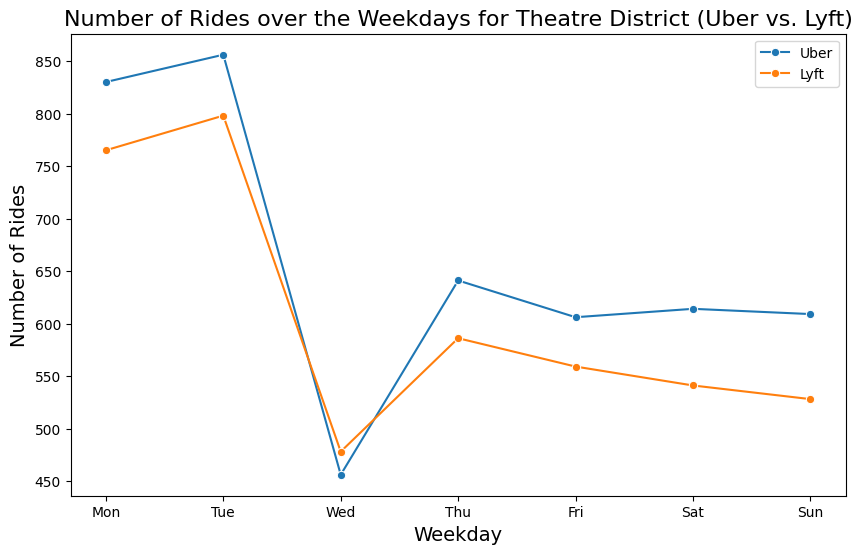

In [ ]:
source_uber = uber[rides['source'] == 'Theatre District']
source_lyft = lyft[rides['source'] == 'Theatre District']

no_of_rides_weekdays(source_uber, source_lyft, 'Theatre District')

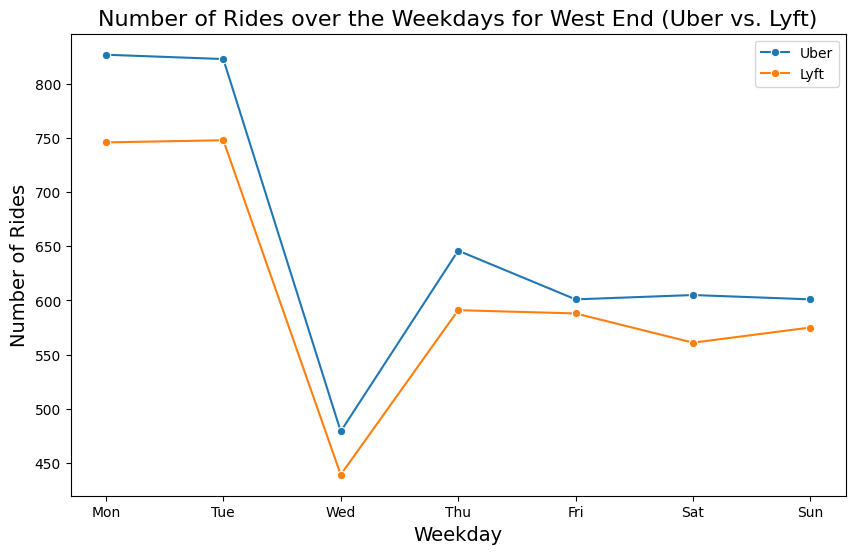

In [ ]:
source_uber = uber[rides['source'] == 'West End']
source_lyft = lyft[rides['source'] == 'West End']

no_of_rides_weekdays(source_uber, source_lyft, 'West End')

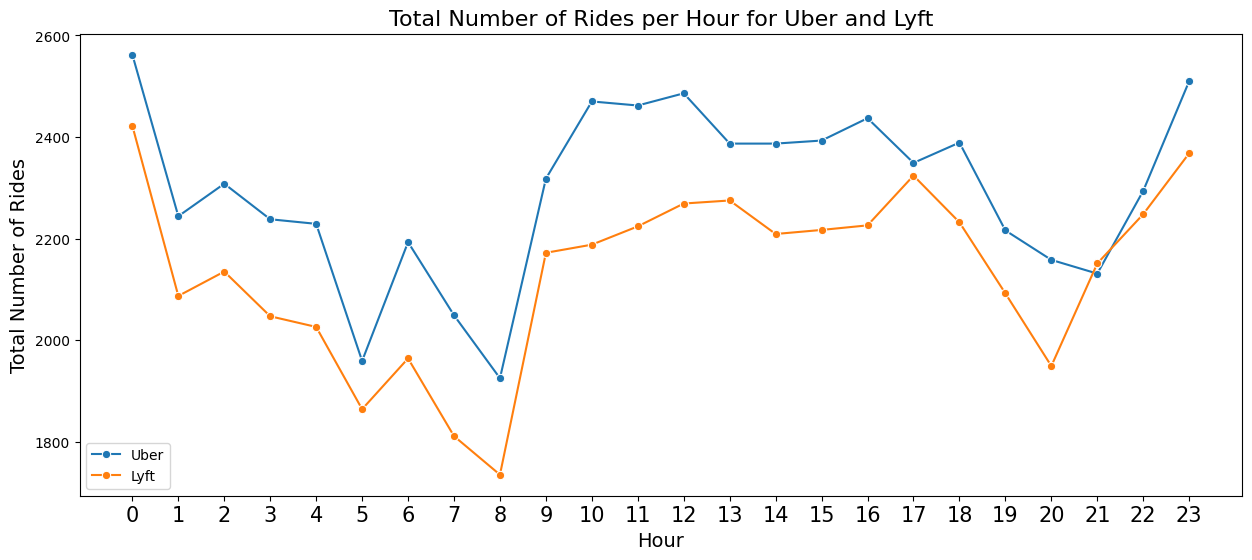

In [ ]:
rides_per_hour_uber = uber['time'].value_counts().sort_index()
rides_per_hour_lyft = lyft['time'].value_counts().sort_index()

# Set up the plot
plt.figure(figsize=(15, 6))

# Plot the total number of rides per hour for Uber
sns.lineplot(x=rides_per_hour_uber.index, y=rides_per_hour_uber.values, marker='o', label='Uber')

# Plot the total number of rides per hour for Lyft
sns.lineplot(x=rides_per_hour_lyft.index, y=rides_per_hour_lyft.values, marker='o', label='Lyft')

# Set labels and title
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Total Number of Rides', fontsize=14)
plt.title('Total Number of Rides per Hour for Uber and Lyft', fontsize=16)
plt.xticks(np.arange(0,24,1),fontsize=15)

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
count = rides.isna().sum().sum()
count

0

In [ ]:
#columns_to_drop = ['surge_multiplier', 'id', 'product_id', 'time_stamp', 'cab_type', 'name', 'date']
columns_to_drop = ['id', 'product_id', 'time_stamp', 'cab_type', 'name', 'date']

In [ ]:
X = rides.drop(columns_to_drop, axis=1)
y = rides['cab_type']
X

distance              destination            source  price  \
2           0.44            North Station  Haymarket Square    7.0   
11          1.08  Northeastern University          Back Bay    7.0   
14          1.11                 West End         North End    7.5   
21          0.72         Haymarket Square     North Station    7.0   
28          2.48            South Station       Beacon Hill    8.5   
...          ...                      ...               ...    ...   
693039      1.81              Beacon Hill         North End    9.0   
693051      3.11                   Fenway  Theatre District   10.5   
693052      0.91              Beacon Hill  Haymarket Square    7.0   
693061      1.61         Haymarket Square  Theatre District   15.0   
693067      1.00                North End          West End    9.5   

        surge_multiplier  time  week_day  
2                    1.0     1         2  
11                   1.0    19         2  
14                   1.0    19         3  
21                   1.0    11         1  
28                   1.0    10         3  
...                  ...   ...       ...  
693039               1.0     1         3  
693051               1.0     1         3  
693052               1.0     1         3  
693061               1.0     5         6  
693067               1.0    23         5  

[106329 rows x 7 columns]

In [ ]:
# Define the replacement dictionaries
destination_mapping = {'Back Bay': 0, 'Beacon Hill': 1, 'Boston University': 2, 'Fenway': 3,
                        'Financial District': 4, 'Haymarket Square': 5, 'North End': 6,
                        'North Station': 7, 'Northeastern University': 8, 'South Station': 9,
                        'Theatre District': 10, 'West End': 11}

source_mapping = {'Back Bay': 0, 'Beacon Hill': 1, 'Boston University': 2, 'Fenway': 3,
                   'Financial District': 4, 'Haymarket Square': 5, 'North End': 6,
                   'North Station': 7, 'Northeastern University': 8, 'South Station': 9,
                   'Theatre District': 10, 'West End': 11}

# Map the values using the map function
X['destination'] = X['destination'].map(destination_mapping)
X['source'] = X['source'].map(source_mapping)
#X['date'] = X['date'].astype(str)
X

distance  destination  source  price  surge_multiplier  time  week_day
2           0.44            7       5    7.0               1.0     1         2
11          1.08            8       0    7.0               1.0    19         2
14          1.11           11       6    7.5               1.0    19         3
21          0.72            5       7    7.0               1.0    11         1
28          2.48            9       1    8.5               1.0    10         3
...          ...          ...     ...    ...               ...   ...       ...
693039      1.81            1       6    9.0               1.0     1         3
693051      3.11            3      10   10.5               1.0     1         3
693052      0.91            1       5    7.0               1.0     1         3
693061      1.61            5      10   15.0               1.0     5         6
693067      1.00            6      11    9.5               1.0    23         5

[106329 rows x 7 columns]

In [ ]:
y = y.replace({'Uber': 0, 'Lyft': 1})
y

2         1
11        1
14        0
21        1
28        0
         ..
693039    1
693051    1
693052    0
693061    0
693067    0
Name: cab_type, Length: 106329, dtype: int64

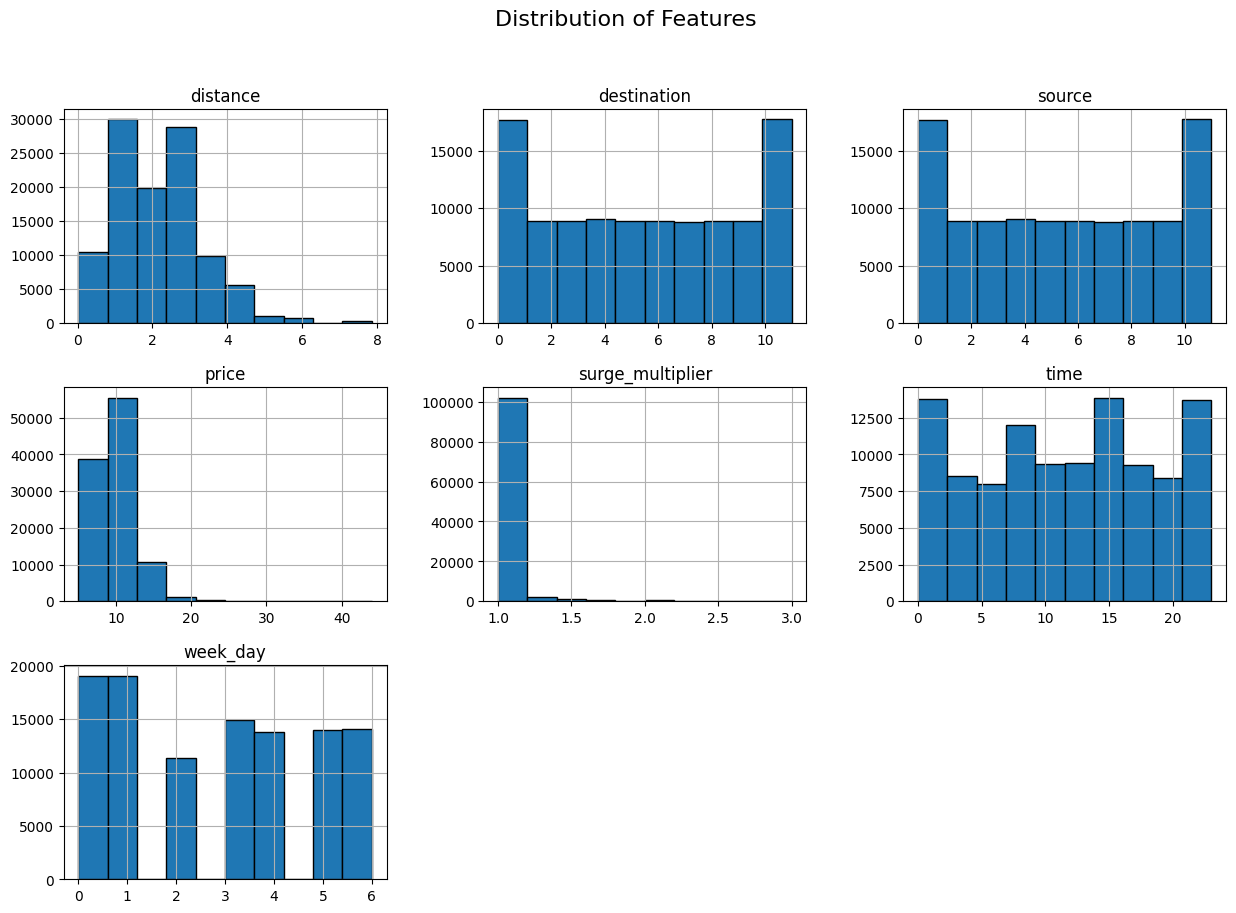

In [ ]:
features = X._get_numeric_data()
features.hist(bins=10, edgecolor='k', figsize=(15, 10))
plt.suptitle('Distribution of Features', fontsize=16)
plt.show()

#SVM Algorithm before merging the datasets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
svc_clf = SVC()
svc_clf.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = svc_clf.predict(X_test)

##Evaluating the model on the basis of various metrics

In [ ]:
Precision= precision_score(y_test, y_pred, average='weighted')
F1_Score= f1_score(y_test, y_pred, average='weighted')
Recall= recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print('Recall :', Recall)
print('Precision :', Precision)
print('F1-SCore :', F1_Score)

Accuracy: 0.5931220414433054
Recall : 0.3543686162253594
Precision : 0.6070822091097449
F1-SCore : 0.5695875448692559


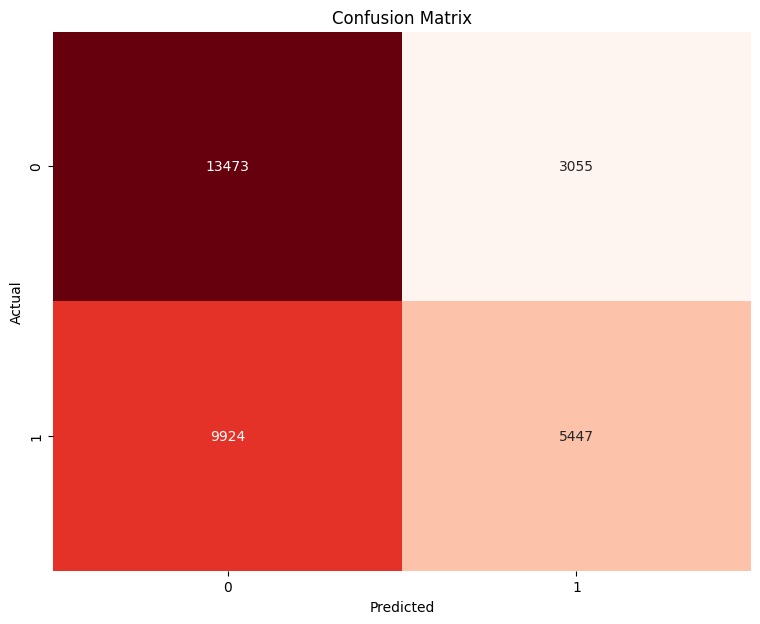

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9, 7))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The above SVM is performed only on ride dataset without considering the weather features.

#Splitting the dataset and training the model uing logistic regression

In [ ]:
#columns_to_drop = ['surge_multiplier', 'id', 'product_id', 'time_stamp', 'cab_type', 'name', 'date']
columns_to_drop = ['id', 'product_id', 'time_stamp', 'cab_type', 'name', 'date']

In [ ]:
X = rides.drop(columns_to_drop, axis=1)
y = rides['cab_type']
X

distance              destination            source  price  \
2           0.44            North Station  Haymarket Square    7.0   
11          1.08  Northeastern University          Back Bay    7.0   
14          1.11                 West End         North End    7.5   
21          0.72         Haymarket Square     North Station    7.0   
28          2.48            South Station       Beacon Hill    8.5   
...          ...                      ...               ...    ...   
693039      1.81              Beacon Hill         North End    9.0   
693051      3.11                   Fenway  Theatre District   10.5   
693052      0.91              Beacon Hill  Haymarket Square    7.0   
693061      1.61         Haymarket Square  Theatre District   15.0   
693067      1.00                North End          West End    9.5   

        surge_multiplier  time  week_day  
2                    1.0     1         2  
11                   1.0    19         2  
14                   1.0    19         3  
21                   1.0    11         1  
28                   1.0    10         3  
...                  ...   ...       ...  
693039               1.0     1         3  
693051               1.0     1         3  
693052               1.0     1         3  
693061               1.0     5         6  
693067               1.0    23         5  

[106329 rows x 7 columns]

In [ ]:
destination_mapping = {'Back Bay': 0, 'Beacon Hill': 1, 'Boston University': 2, 'Fenway': 3,
                        'Financial District': 4, 'Haymarket Square': 5, 'North End': 6,
                        'North Station': 7, 'Northeastern University': 8, 'South Station': 9,
                        'Theatre District': 10, 'West End': 11}

source_mapping = {'Back Bay': 0, 'Beacon Hill': 1, 'Boston University': 2, 'Fenway': 3,
                   'Financial District': 4, 'Haymarket Square': 5, 'North End': 6,
                   'North Station': 7, 'Northeastern University': 8, 'South Station': 9,
                   'Theatre District': 10, 'West End': 11}

# Map the values using the map function
X['destination'] = X['destination'].map(destination_mapping)
X['source'] = X['source'].map(source_mapping)
#X['date'] = X['date'].astype(str)

In [ ]:
y = y.replace({'Uber': 0, 'Lyft': 1})
y

2         1
11        1
14        0
21        1
28        0
         ..
693039    1
693051    1
693052    0
693061    0
693067    0
Name: cab_type, Length: 106329, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
logistic_regression = LogisticRegression()

In [ ]:
logistic_regression.fit(X_train, y_train)

LogisticRegression()

Similar to svm, logistic regression is performed only on the rides dataset ignoring the weather features.

##Evaluating the model using various metrics

In [ ]:
y_pred =logistic_regression.predict(X_test)
f1score = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("f1_score", f1score)
print("precision", precision)
print("recall", recall)

f1_score 0.5029083768663629
precision 0.58407917383821
recall 0.44154576800468415


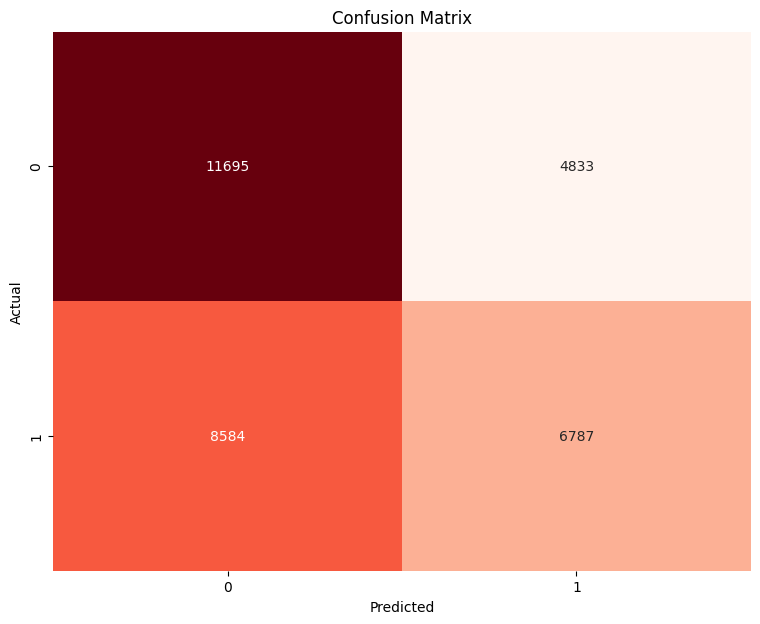

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9, 7))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Splitting the dataset and training the model uing KNN

In [ ]:
#columns_to_drop = ['surge_multiplier', 'id', 'product_id', 'time_stamp', 'cab_type', 'name', 'date']
columns_to_drop = ['id', 'product_id', 'time_stamp', 'cab_type', 'name', 'date']

In [ ]:
X = rides.drop(columns_to_drop, axis=1)
y = rides['cab_type']
X

distance              destination            source  price  \
2           0.44            North Station  Haymarket Square    7.0   
11          1.08  Northeastern University          Back Bay    7.0   
14          1.11                 West End         North End    7.5   
21          0.72         Haymarket Square     North Station    7.0   
28          2.48            South Station       Beacon Hill    8.5   
...          ...                      ...               ...    ...   
693039      1.81              Beacon Hill         North End    9.0   
693051      3.11                   Fenway  Theatre District   10.5   
693052      0.91              Beacon Hill  Haymarket Square    7.0   
693061      1.61         Haymarket Square  Theatre District   15.0   
693067      1.00                North End          West End    9.5   

        surge_multiplier  time  week_day  
2                    1.0     1         2  
11                   1.0    19         2  
14                   1.0    19         3  
21                   1.0    11         1  
28                   1.0    10         3  
...                  ...   ...       ...  
693039               1.0     1         3  
693051               1.0     1         3  
693052               1.0     1         3  
693061               1.0     5         6  
693067               1.0    23         5  

[106329 rows x 7 columns]

In [ ]:
destination_mapping = {'Back Bay': 0, 'Beacon Hill': 1, 'Boston University': 2, 'Fenway': 3,
                        'Financial District': 4, 'Haymarket Square': 5, 'North End': 6,
                        'North Station': 7, 'Northeastern University': 8, 'South Station': 9,
                        'Theatre District': 10, 'West End': 11}

source_mapping = {'Back Bay': 0, 'Beacon Hill': 1, 'Boston University': 2, 'Fenway': 3,
                   'Financial District': 4, 'Haymarket Square': 5, 'North End': 6,
                   'North Station': 7, 'Northeastern University': 8, 'South Station': 9,
                   'Theatre District': 10, 'West End': 11}

# Map the values using the map function
X['destination'] = X['destination'].map(destination_mapping)
X['source'] = X['source'].map(source_mapping)
#X['date'] = X['date'].astype(str)
X

distance  destination  source  price  surge_multiplier  time  week_day
2           0.44            7       5    7.0               1.0     1         2
11          1.08            8       0    7.0               1.0    19         2
14          1.11           11       6    7.5               1.0    19         3
21          0.72            5       7    7.0               1.0    11         1
28          2.48            9       1    8.5               1.0    10         3
...          ...          ...     ...    ...               ...   ...       ...
693039      1.81            1       6    9.0               1.0     1         3
693051      3.11            3      10   10.5               1.0     1         3
693052      0.91            1       5    7.0               1.0     1         3
693061      1.61            5      10   15.0               1.0     5         6
693067      1.00            6      11    9.5               1.0    23         5

[106329 rows x 7 columns]

In [ ]:
y = y.replace({'Uber': 0, 'Lyft': 1})
y

2         1
11        1
14        0
21        1
28        0
         ..
693039    1
693051    1
693052    0
693061    0
693067    0
Name: cab_type, Length: 106329, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
knn_classifier = KNeighborsClassifier()

In [ ]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_classifier.predict(X_test)

##Evaluating the model using various metrics

In [ ]:
Precision= precision_score(y_test, y_pred, average='weighted')
F1_Score= f1_score(y_test, y_pred, average='weighted')
Recall= recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print('Recall :', Recall)
print('Precision :', Precision)
print('F1-SCore :', F1_Score)

Accuracy: 0.7220602526724975
Recall : 0.7452345325613168
Precision : 0.7236483928455868
F1-SCore : 0.7220949925776633


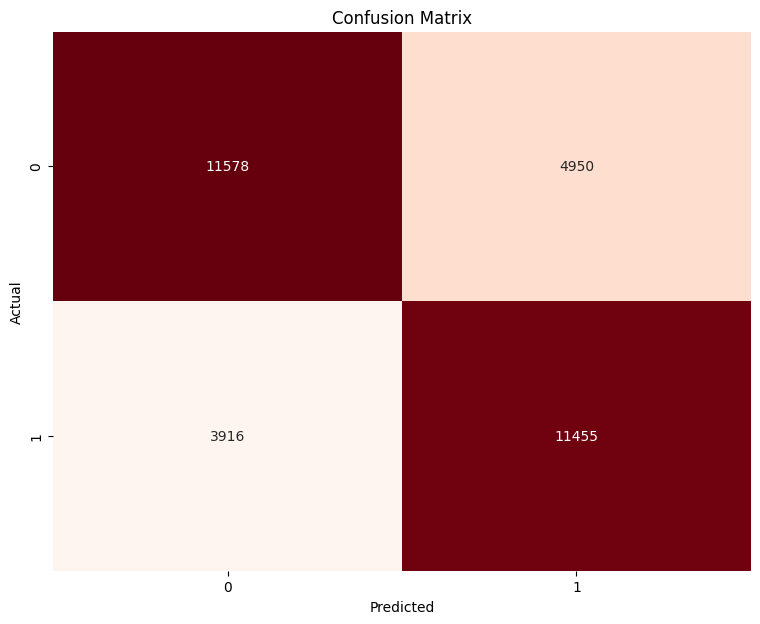

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9, 7))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The accuracy of KNN is highest when compared to SVM and logistic regression, so now we perform hyperparaameter tuning in KNN.

#Hypertuning the knn model using GridSereachCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Create a KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

# Define the hyperparameters and their possible values
param_grid = {
    'n_neighbors': [ 10, 30, 100, 500],   # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weighting strategy
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Create the grid search object
grid_search = GridSearchCV(knn_classifier, param_grid, scoring='accuracy', cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Use the best hyperparameters to train the model
best_knn_classifier = KNeighborsClassifier(**best_params)
best_knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_knn_classifier.predict(X_test)

# Evaluate the performance of the model
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print('Recall:', recall)
print('Precision:', precision)
print('F1-Score:', f1_score)


Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 500, 'weights': 'distance'}
Accuracy: 0.815041223862817
Recall: 0.8063235963827988
Precision: 0.8150220918730704
F1-Score: 0.8150293200776663


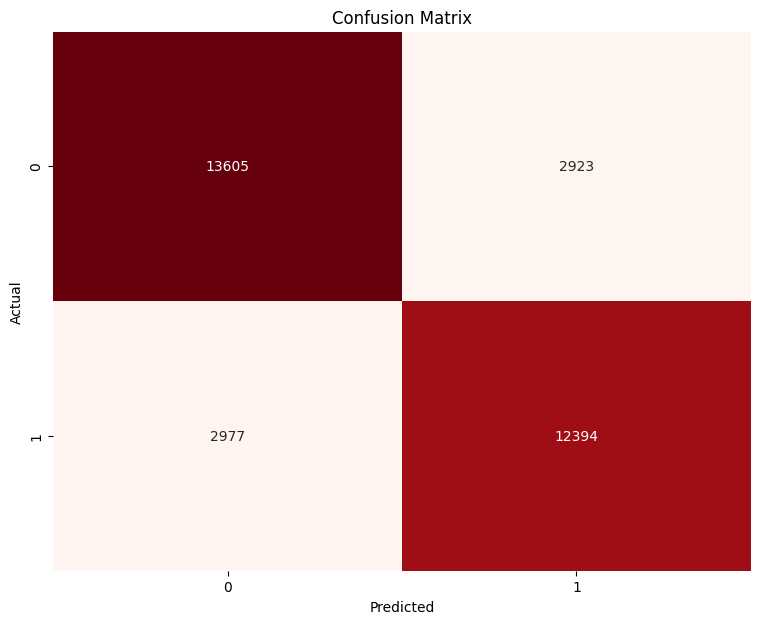

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9, 7))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The model have performed better when hyperparameter tuning is performed.
The accuracy have increased.

#Merging Rides dataset and weather dataset.
#Considering the impact of weather on user preference



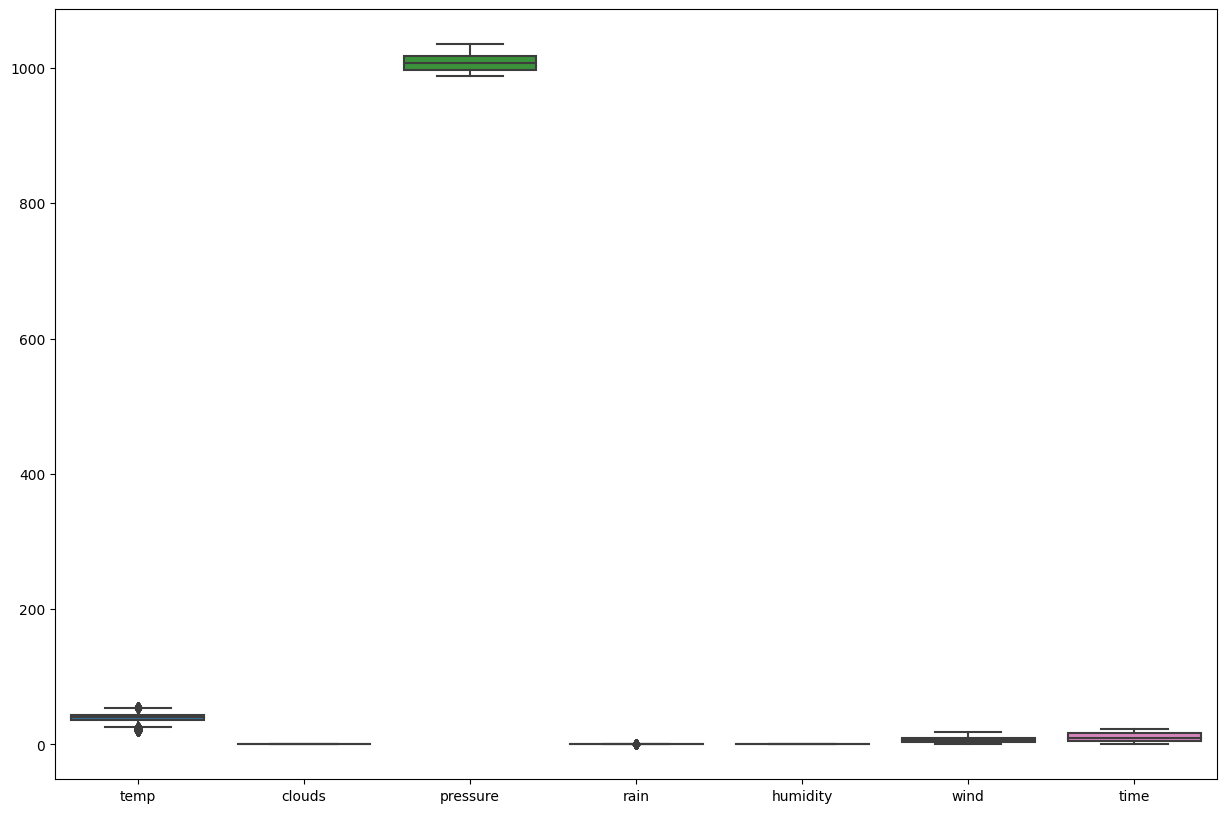

In [ ]:
columns = ["temp", "clouds", "pressure", "rain", "humidity", "wind", "time"]
plt.figure(figsize=(15, 10))
sns.boxplot(data=weather_data[columns])
plt.show()

#Data preprocessing and visualization

In [ ]:
weather_data.set_index(weather_data['time_stamp'],drop=False)

temp                 location  clouds  pressure    rain  \
time_stamp                                                                      
2018-12-16 23:45:01  42.42                 Back Bay    1.00   1012.14  0.1228   
2018-12-16 23:45:01  42.43              Beacon Hill    1.00   1012.15  0.1846   
2018-12-16 23:45:01  42.50        Boston University    1.00   1012.15  0.1089   
2018-12-16 23:45:01  42.11                   Fenway    1.00   1012.13  0.0969   
2018-12-16 23:45:01  43.13       Financial District    1.00   1012.14  0.1786   
...                    ...                      ...     ...       ...     ...   
2018-12-03 06:52:54  44.72            North Station    0.89   1000.69     NaN   
2018-12-03 06:52:54  44.85  Northeastern University    0.88   1000.71     NaN   
2018-12-03 06:52:54  44.82            South Station    0.89   1000.70     NaN   
2018-12-03 06:52:54  44.78         Theatre District    0.89   1000.70     NaN   
2018-12-03 06:52:54  44.69                 West End    0.89   1000.70     NaN   

                             time_stamp  humidity   wind        date  time  
time_stamp                                                                  
2018-12-16 23:45:01 2018-12-16 23:45:01      0.77  11.25  2018-12-16    23  
2018-12-16 23:45:01 2018-12-16 23:45:01      0.76  11.32  2018-12-16    23  
2018-12-16 23:45:01 2018-12-16 23:45:01      0.76  11.07  2018-12-16    23  
2018-12-16 23:45:01 2018-12-16 23:45:01      0.77  11.09  2018-12-16    23  
2018-12-16 23:45:01 2018-12-16 23:45:01      0.75  11.49  2018-12-16    23  
...                                 ...       ...    ...         ...   ...  
2018-12-03 06:52:54 2018-12-03 06:52:54      0.96   1.52  2018-12-03     6  
2018-12-03 06:52:54 2018-12-03 06:52:54      0.96   1.54  2018-12-03     6  
2018-12-03 06:52:54 2018-12-03 06:52:54      0.96   1.54  2018-12-03     6  
2018-12-03 06:52:54 2018-12-03 06:52:54      0.96   1.54  2018-12-03     6  
2018-12-03 06:52:54 2018-12-03 06:52:54      0.96   1.52  2018-12-03     6  

[6276 rows x 10 columns]

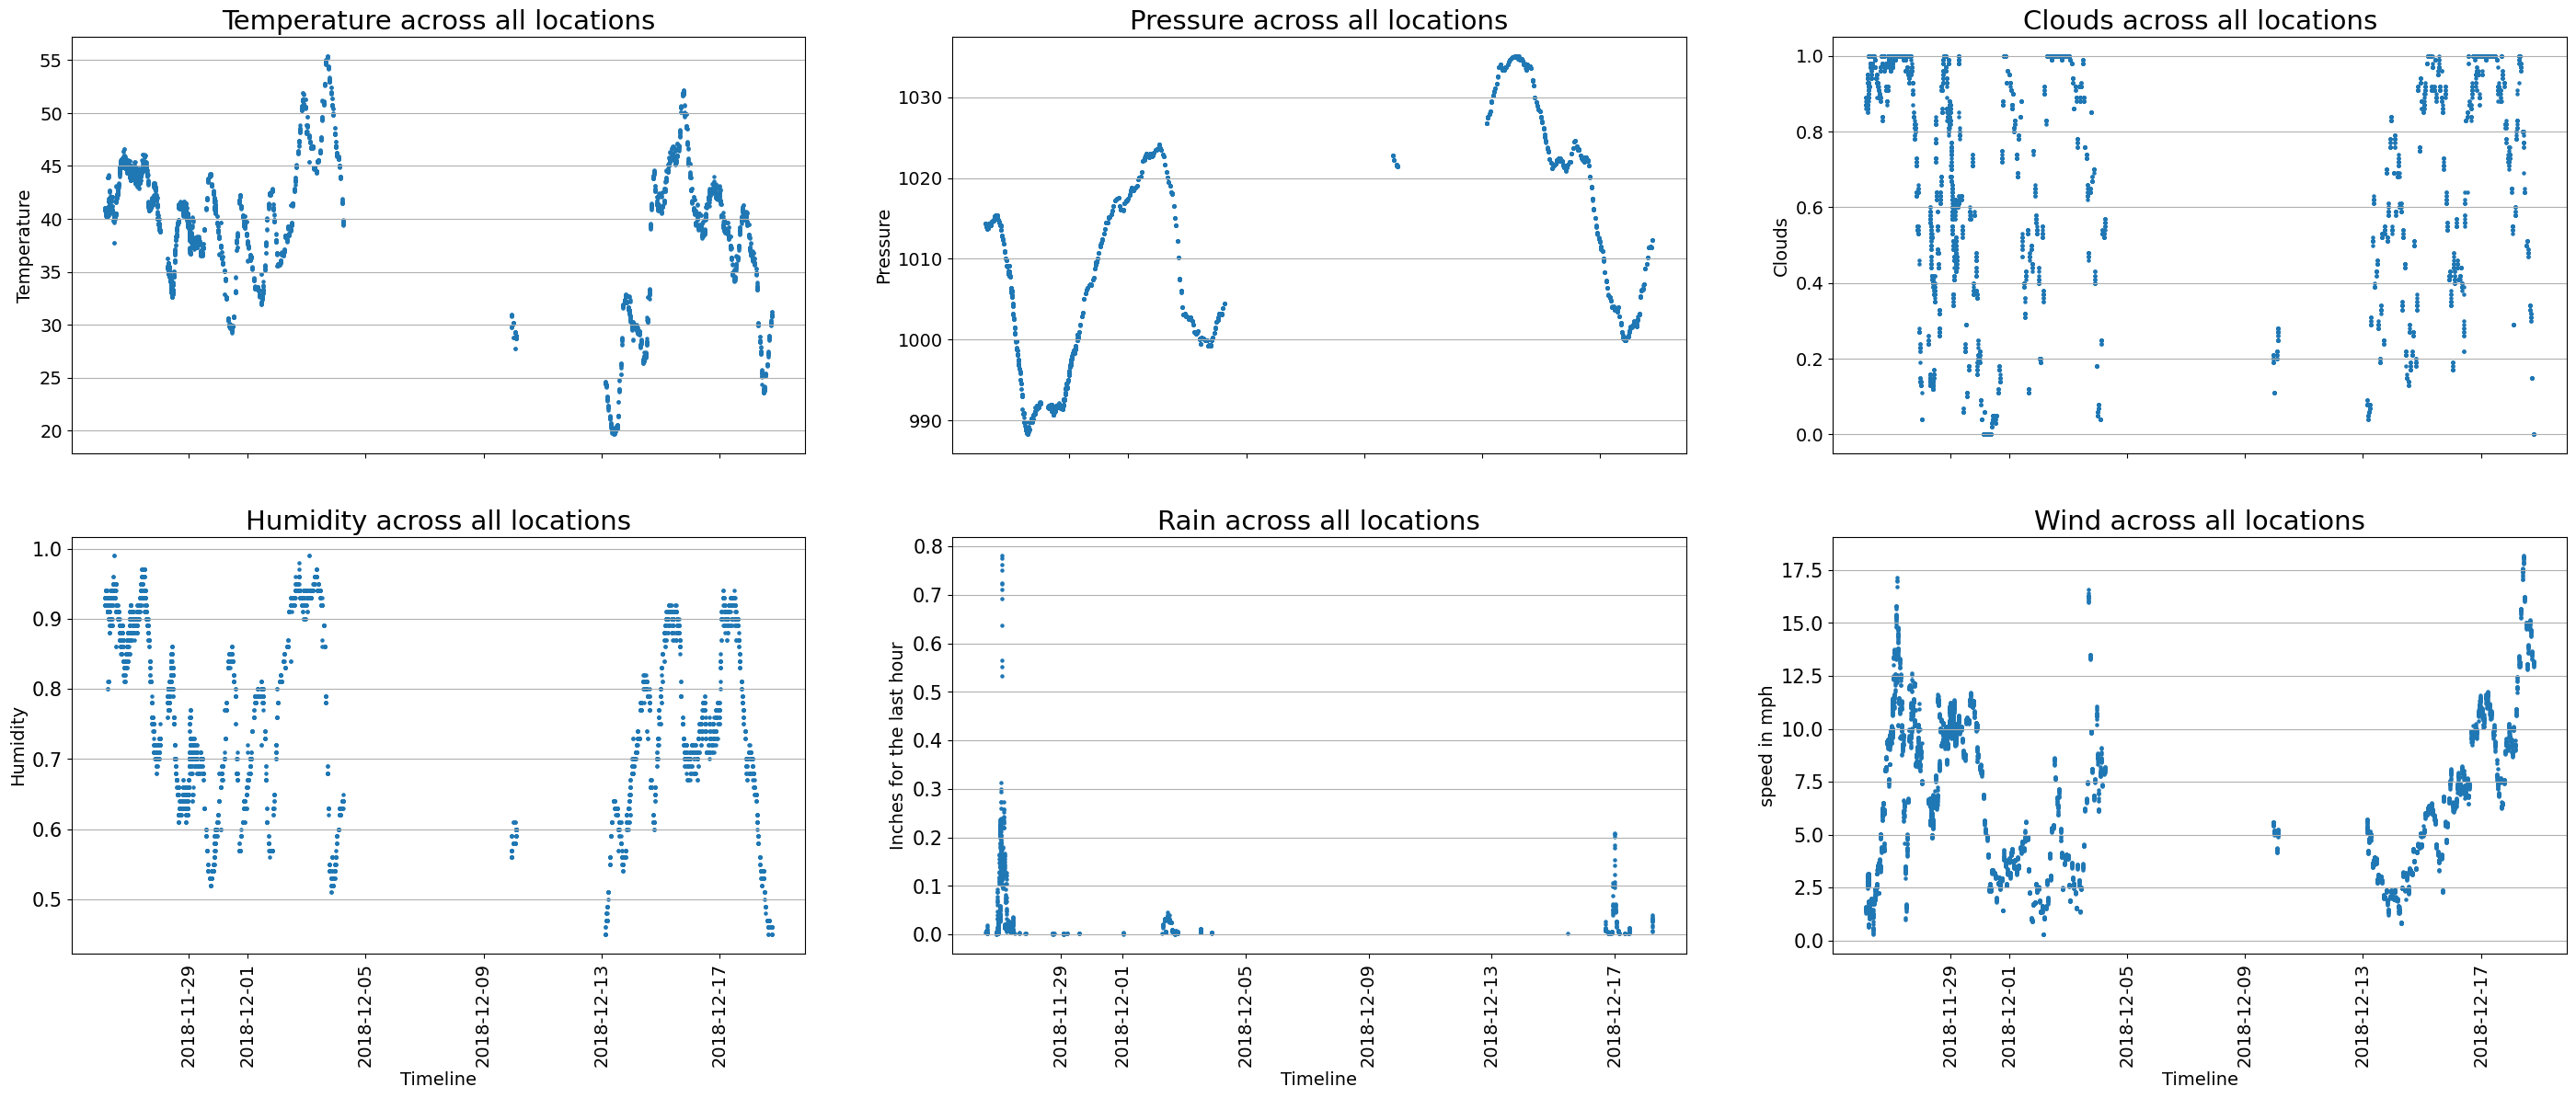

In [ ]:
plt.figure(figsize=((35,20)))
plt.grid(axis='y')

plt.subplot(3,3,1)
plt.scatter(weather_data['time_stamp'],weather_data['temp'],s=5)
plt.xticks(color='white')
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('Temperature',fontsize=14)
plt.title('Temperature across all locations',fontsize=21)
plt.grid(axis='y')

plt.subplot(3,3,2)
plt.scatter(weather_data['time_stamp'],weather_data['pressure'],s=5)
plt.xticks(color='white')
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('Pressure',fontsize=14)
plt.title('Pressure across all locations',fontsize=21)
plt.grid(axis='y')

plt.subplot(3,3,3)
plt.scatter(weather_data['time_stamp'],weather_data['clouds'],s=5)
plt.xticks(color='white')
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('Clouds',fontsize=14)
plt.title('Clouds across all locations',fontsize=21)
plt.grid(axis='y')

plt.subplot(3,3,4)
plt.scatter(weather_data['time_stamp'],weather_data['humidity'],s=5)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=15)
plt.xlabel('Timeline',fontsize=14)
plt.ylabel('Humidity',fontsize=14)
plt.title('Humidity across all locations',fontsize=21)
plt.grid(axis='y')

plt.subplot(3,3,5)
plt.scatter(weather_data['time_stamp'],weather_data['rain'],s=5)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=15)
plt.xlabel('Timeline',fontsize=14)
plt.ylabel('Inches for the last hour',fontsize=14)
plt.title('Rain across all locations',fontsize=21)
plt.grid(axis='y')

plt.subplot(3,3,6)
plt.scatter(weather_data['time_stamp'],weather_data['wind'],s=5)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=15)
plt.xlabel('Timeline',fontsize=14)
plt.ylabel('speed in mph',fontsize=14)
plt.title('Wind across all locations',fontsize=21)
plt.grid(axis='y')

plt.show()

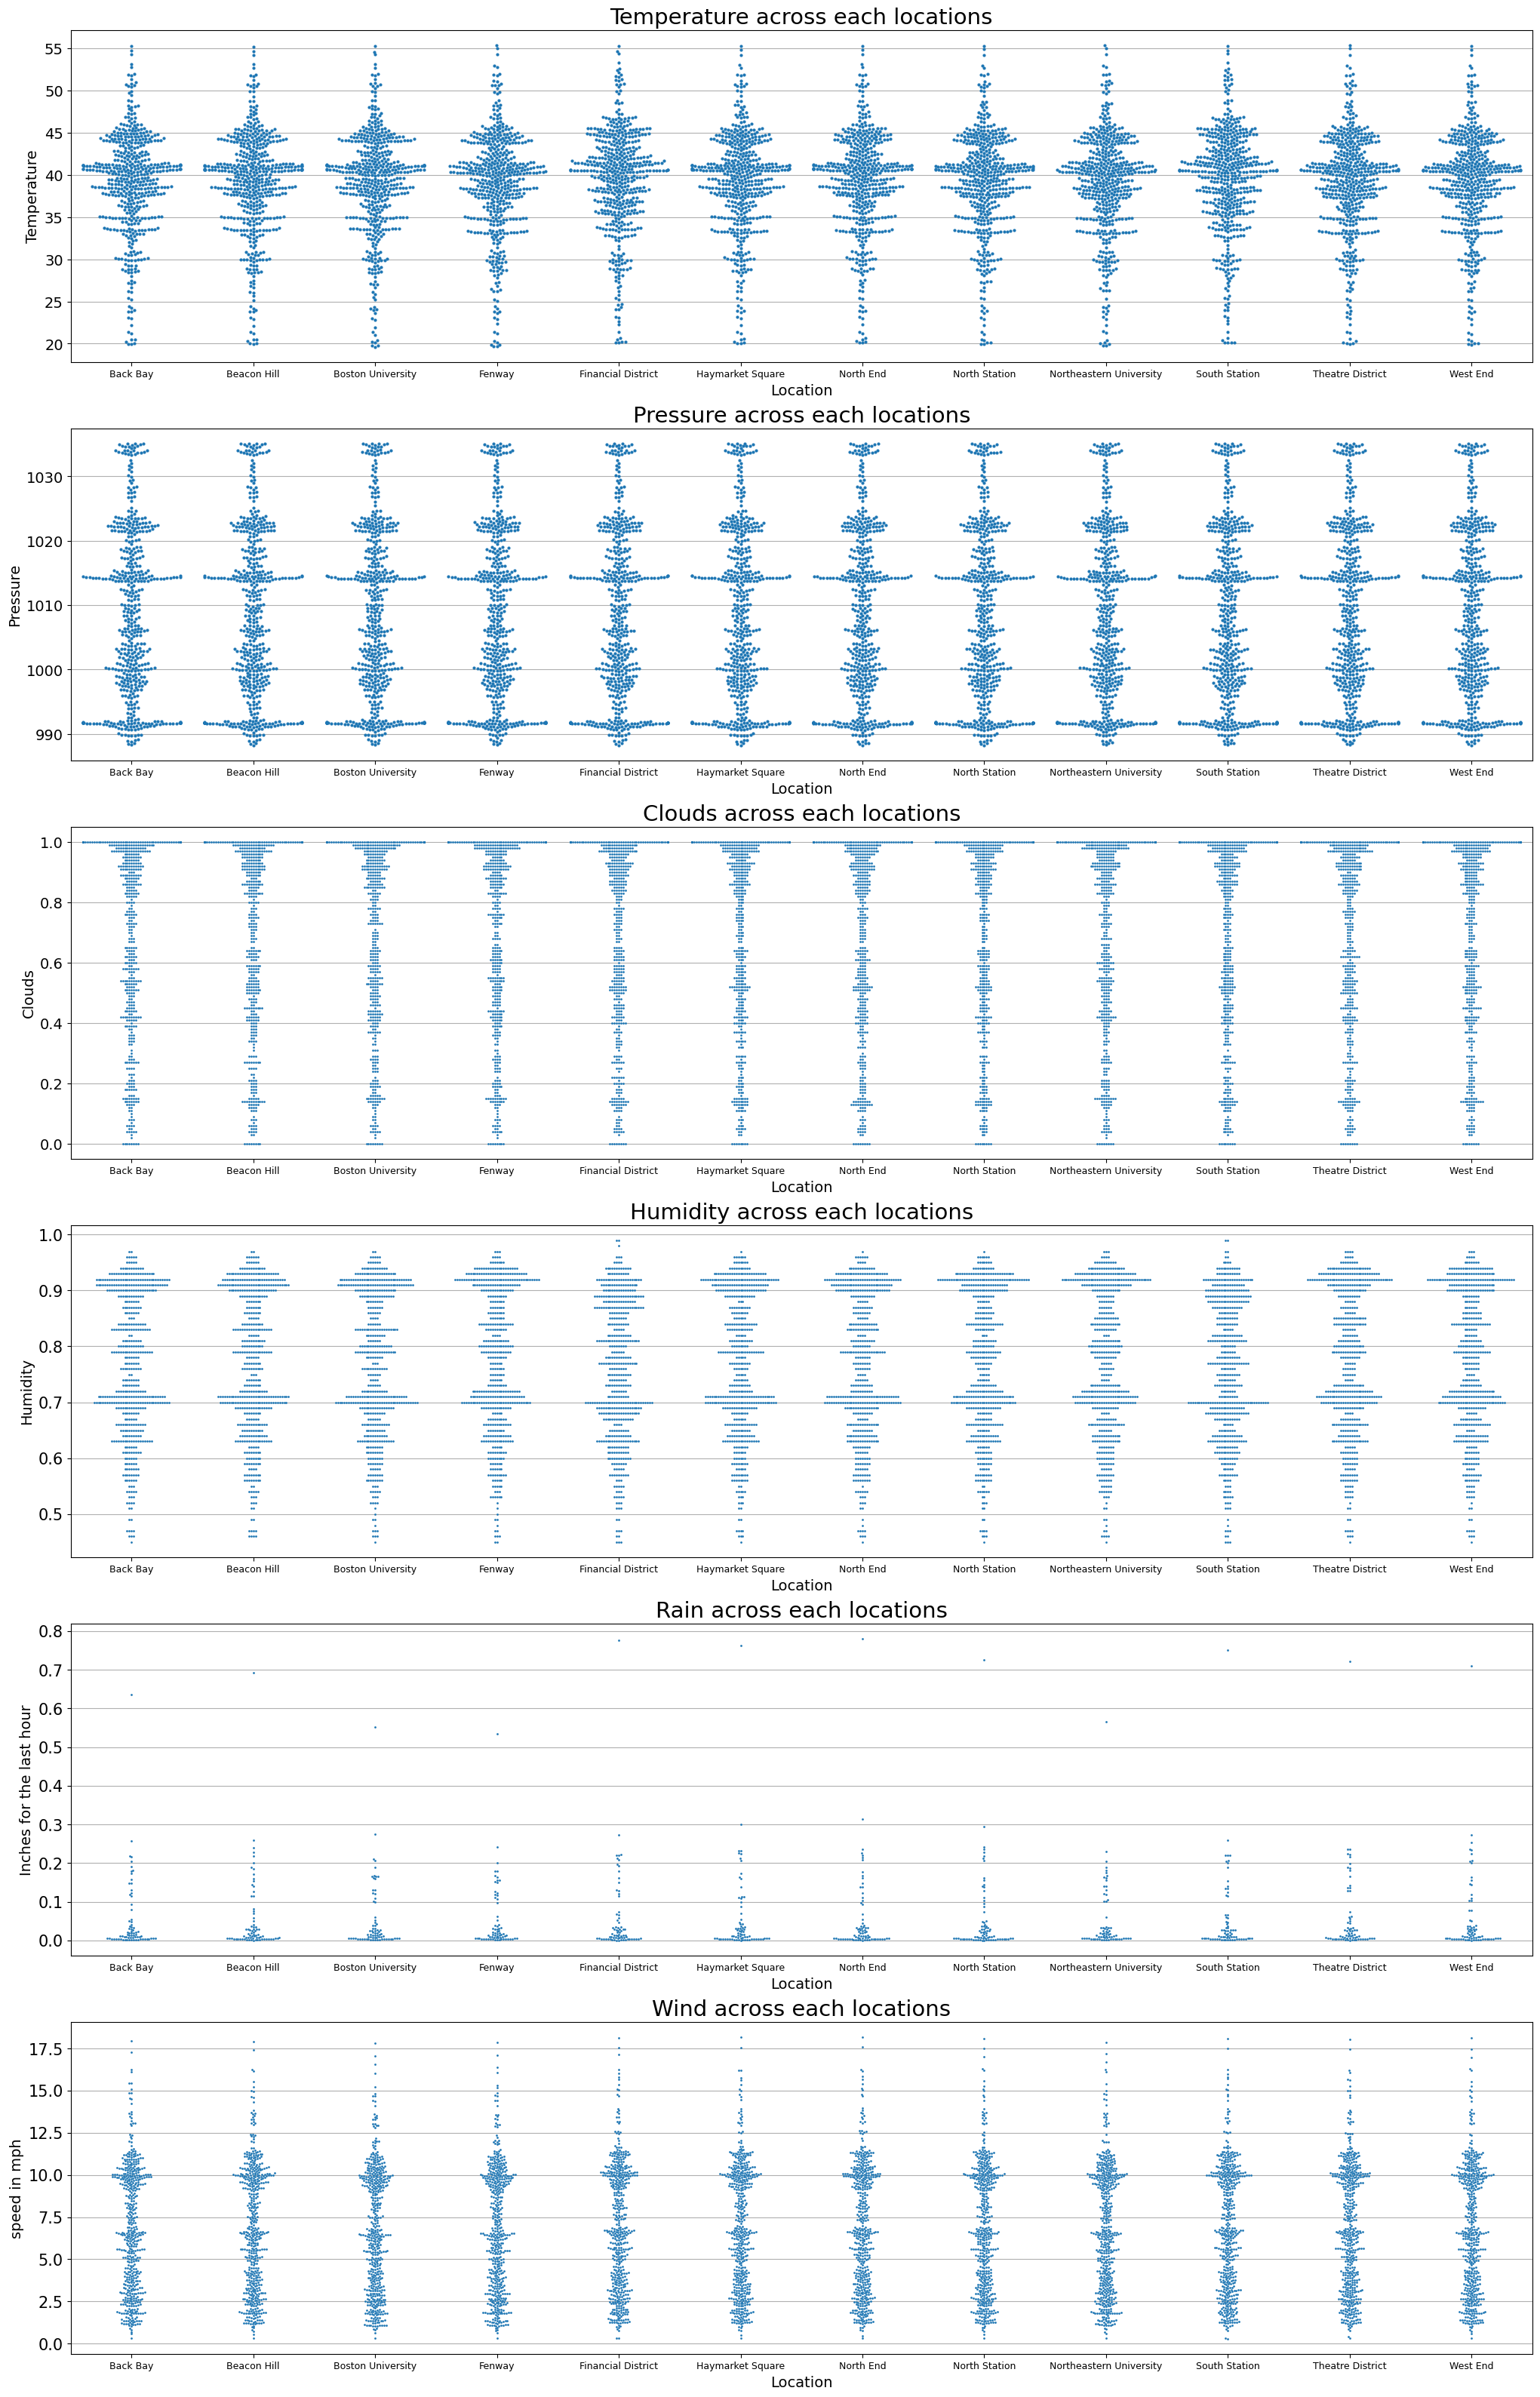

In [ ]:
plt.figure(figsize=((25,40)))
plt.grid(axis='y')

plt.subplot(6,1,1)
sns.swarmplot(x='location',y='temp',data=weather_data,size=3)
plt.xticks(fontsize=9)
plt.yticks(fontsize=14)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Temperature',fontsize=14)
plt.title('Temperature across each locations',fontsize=21)
plt.grid(axis='y')

plt.subplot(6,1,2)
sns.swarmplot(x='location',y='pressure',data=weather_data,size=3)
plt.xticks(fontsize=9)
plt.yticks(fontsize=14)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Pressure',fontsize=14)
plt.title('Pressure across each locations',fontsize=21)
plt.grid(axis='y')

plt.subplot(6,1,3)
sns.swarmplot(x='location',y='clouds',data=weather_data,size=2)
plt.xticks(fontsize=9)
plt.yticks(fontsize=14)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Clouds',fontsize=14)
plt.title('Clouds across each locations',fontsize=21)
plt.grid(axis='y')

plt.subplot(6,1,4)
sns.swarmplot(x='location',y='humidity',data=weather_data,size=2)
plt.xticks(fontsize=9)
plt.yticks(fontsize=15)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Humidity',fontsize=14)
plt.title('Humidity across each locations',fontsize=21)
plt.grid(axis='y')

plt.subplot(6,1,5)
sns.swarmplot(x='location',y='rain',data=weather_data,size=2)
plt.xticks(fontsize=9)
plt.yticks(fontsize=15)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Inches for the last hour',fontsize=14)
plt.title('Rain across each locations',fontsize=21)
plt.grid(axis='y')

plt.subplot(6,1,6)
sns.swarmplot(x='location',y='wind',data=weather_data,size=2)
plt.xticks(fontsize=9)
plt.yticks(fontsize=15)
plt.xlabel('Location', fontsize=14)
plt.ylabel('speed in mph',fontsize=14)
plt.title('Wind across each locations',fontsize=21)
plt.grid(axis='y')

plt.show()

#Merging the ride and weather dataset

Here we are merging the rides dataset and weather dataset.

In [ ]:
rides['date_location'] = rides['source'].astype(str)+', '+rides['date'].astype(str)+', '+rides['time'].astype(str)
weather_grouped = weather_data.groupby(['location','date','time']).mean()
weather_grouped = pd.DataFrame(weather_grouped).reset_index()
weather_grouped['date_location'] = weather_grouped['location'].astype(str)+', '+weather_grouped['date'].astype(str)+', '+weather_grouped['time'].astype(str)
weather_grouped.index = weather_grouped['date_location']
merged_ride = rides.join(weather_grouped,on=['date_location'],rsuffix='_weather')
merged_ride['rain'].fillna(0,inplace=True)
merged_ride

distance cab_type                    time_stamp  \
2           0.44     Lyft 2018-11-28 01:00:22.197999872   
11          1.08     Lyft 2018-11-28 19:23:07.778000128   
14          1.11     Uber 2018-12-13 19:15:03.935000064   
21          0.72     Lyft 2018-12-18 11:35:05.654000128   
28          2.48     Uber 2018-12-13 10:40:11.530999808   
...          ...      ...                           ...   
693039      1.81     Lyft 2018-11-29 01:03:40.023000064   
693051      3.11     Lyft 2018-11-29 01:47:08.122999808   
693052      0.91     Uber 2018-11-29 01:47:08.122999808   
693061      1.61     Uber 2018-12-02 05:28:04.148999936   
693067      1.00     Uber 2018-12-01 23:53:05.533999872   

                    destination            source  price  surge_multiplier  \
2                 North Station  Haymarket Square    7.0               1.0   
11      Northeastern University          Back Bay    7.0               1.0   
14                     West End         North End    7.5               1.0   
21             Haymarket Square     North Station    7.0               1.0   
28                South Station       Beacon Hill    8.5               1.0   
...                         ...               ...    ...               ...   
693039              Beacon Hill         North End    9.0               1.0   
693051                   Fenway  Theatre District   10.5               1.0   
693052              Beacon Hill  Haymarket Square    7.0               1.0   
693061         Haymarket Square  Theatre District   15.0               1.0   
693067                North End          West End    9.5               1.0   

                                          id  \
2       981a3613-77af-4620-a42a-0c0866077d1e   
11      d859ec69-b3ff-4af8-9abd-441e31430c94   
14      357559cb-8c58-4278-a41a-e33b2e0997a3   
21      5ef44fdf-c5d3-4d07-967a-a8710e537e74   
28      4149295f-4534-4712-b2cf-160308528c75   
...                                      ...   
693039  dd63e380-e7f1-4cb8-a513-38e6290b2cf8   
693051  aa4e5808-7357-49d3-b539-bd04d4815665   
693052  aba6db9d-6b6f-4bb2-b9dd-2ceb1fbd1061   
693061  54362c72-124b-47e8-8d07-62a07cfff624   
693067  633a3fc3-1f86-4b9e-9d48-2b7132112341   

                                  product_id   name  ...          location  \
2                                       lyft   Lyft  ...               NaN   
11                                      lyft   Lyft  ...          Back Bay   
14      55c66225-fbe7-4fd5-9072-eab1ece5e23e  UberX  ...         North End   
21                                      lyft   Lyft  ...     North Station   
28      55c66225-fbe7-4fd5-9072-eab1ece5e23e  UberX  ...       Beacon Hill   
...                                      ...    ...  ...               ...   
693039                                  lyft   Lyft  ...         North End   
693051                                  lyft   Lyft  ...  Theatre District   
693052  55c66225-fbe7-4fd5-9072-eab1ece5e23e  UberX  ...  Haymarket Square   
693061  55c66225-fbe7-4fd5-9072-eab1ece5e23e  UberX  ...  Theatre District   
693067  55c66225-fbe7-4fd5-9072-eab1ece5e23e  UberX  ...          West End   

        date_weather  time_weather       temp clouds     pressure    rain  \
2                NaN           NaN        NaN    NaN          NaN  0.0000   
11        2018-11-28          19.0  40.883333  1.000   992.113333  0.0000   
14        2018-12-13          19.0  32.750000  0.510  1033.750000  0.0000   
21        2018-12-18          11.0  23.650000  0.640  1006.820000  0.0000   
28        2018-12-13          10.0  20.030000  0.430  1031.070000  0.0000   
...              ...           ...        ...    ...          ...     ...   
693039    2018-11-29           1.0  38.484000  0.613   997.468000  0.0020   
693051    2018-11-29           1.0  38.301000  0.619   997.487000  0.0013   
693052    2018-11-29           1.0  38.454000  0.614   997.475000  0.0020   
693061    2018-12-02           5.0  37.010000  0.830  1021.650000  0.0000   
6

In [ ]:
merged_ride.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106329 entries, 2 to 693067
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   distance               106329 non-null  float64       
 1   cab_type               106329 non-null  object        
 2   time_stamp             106329 non-null  datetime64[ns]
 3   destination            106329 non-null  object        
 4   source                 106329 non-null  object        
 5   price                  106329 non-null  float64       
 6   surge_multiplier       106329 non-null  float64       
 7   id                     106329 non-null  object        
 8   product_id             106329 non-null  object        
 9   name                   106329 non-null  object        
 10  date                   106329 non-null  object        
 11  time                   106329 non-null  int64         
 12  week_day               106329 non-null  int6

In [ ]:
merged_ride = merged_ride.dropna()
pd.DataFrame(merged_ride).reset_index(drop = True, inplace=True)
merged_ride

distance cab_type                    time_stamp  \
0           1.08     Lyft 2018-11-28 19:23:07.778000128   
1           1.11     Uber 2018-12-13 19:15:03.935000064   
2           0.72     Lyft 2018-12-18 11:35:05.654000128   
3           2.48     Uber 2018-12-13 10:40:11.530999808   
4           3.24     Lyft 2018-12-02 18:23:07.499000064   
...          ...      ...                           ...   
105851      1.81     Lyft 2018-11-29 01:03:40.023000064   
105852      3.11     Lyft 2018-11-29 01:47:08.122999808   
105853      0.91     Uber 2018-11-29 01:47:08.122999808   
105854      1.61     Uber 2018-12-02 05:28:04.148999936   
105855      1.00     Uber 2018-12-01 23:53:05.533999872   

                    destination            source  price  surge_multiplier  \
0       Northeastern University          Back Bay    7.0               1.0   
1                      West End         North End    7.5               1.0   
2              Haymarket Square     North Station    7.0               1.0   
3                 South Station       Beacon Hill    8.5               1.0   
4       Northeastern University     North Station   11.0               1.0   
...                         ...               ...    ...               ...   
105851              Beacon Hill         North End    9.0               1.0   
105852                   Fenway  Theatre District   10.5               1.0   
105853              Beacon Hill  Haymarket Square    7.0               1.0   
105854         Haymarket Square  Theatre District   15.0               1.0   
105855                North End          West End    9.5               1.0   

                                          id  \
0       d859ec69-b3ff-4af8-9abd-441e31430c94   
1       357559cb-8c58-4278-a41a-e33b2e0997a3   
2       5ef44fdf-c5d3-4d07-967a-a8710e537e74   
3       4149295f-4534-4712-b2cf-160308528c75   
4       174b960d-58f1-4dfd-8672-8b43f13726a7   
...                                      ...   
105851  dd63e380-e7f1-4cb8-a513-38e6290b2cf8   
105852  aa4e5808-7357-49d3-b539-bd04d4815665   
105853  aba6db9d-6b6f-4bb2-b9dd-2ceb1fbd1061   
105854  54362c72-124b-47e8-8d07-62a07cfff624   
105855  633a3fc3-1f86-4b9e-9d48-2b7132112341   

                                  product_id   name  ...          location  \
0                                       lyft   Lyft  ...          Back Bay   
1       55c66225-fbe7-4fd5-9072-eab1ece5e23e  UberX  ...         North End   
2                                       lyft   Lyft  ...     North Station   
3       55c66225-fbe7-4fd5-9072-eab1ece5e23e  UberX  ...       Beacon Hill   
4                                       lyft   Lyft  ...     North Station   
...                                      ...    ...  ...               ...   
105851                                  lyft   Lyft  ...         North End   
105852                                  lyft   Lyft  ...  Theatre District   
105853  55c66225-fbe7-4fd5-9072-eab1ece5e23e  UberX  ...  Haymarket Square   
105854  55c66225-fbe7-4fd5-9072-eab1ece5e23e  UberX  ...  Theatre District   
105855  55c66225-fbe7-4fd5-9072-eab1ece5e23e  UberX  ...          West End   

        date_weather  time_weather       temp clouds     pressure    rain  \
0         2018-11-28          19.0  40.883333  1.000   992.113333  0.0000   
1         2018-12-13          19.0  32.750000  0.510  1033.750000  0.0000   
2         2018-12-18          11.0  23.650000  0.640  1006.820000  0.0000   
3         2018-12-13          10.0  20.030000  0.430  1031.070000  0.0000   
4         2018-12-02          18.0  48.340000  0.990  1006.020000  0.0030   
...              ...           ...        ...    ...          ...     ...   
105851    2018-11-29           1.0  38.484000  0.613   997.468000  0.0020   
105852    2018-11-29           1.0  38.301000  0.619   997.487000  0.0013   
105853    2018-11-29           1.0  38.454000  0.614   997.475000  0.0020   
105854    2018-12-02           5.0  37.010000  0.830  1021.650000  0.0000   
1

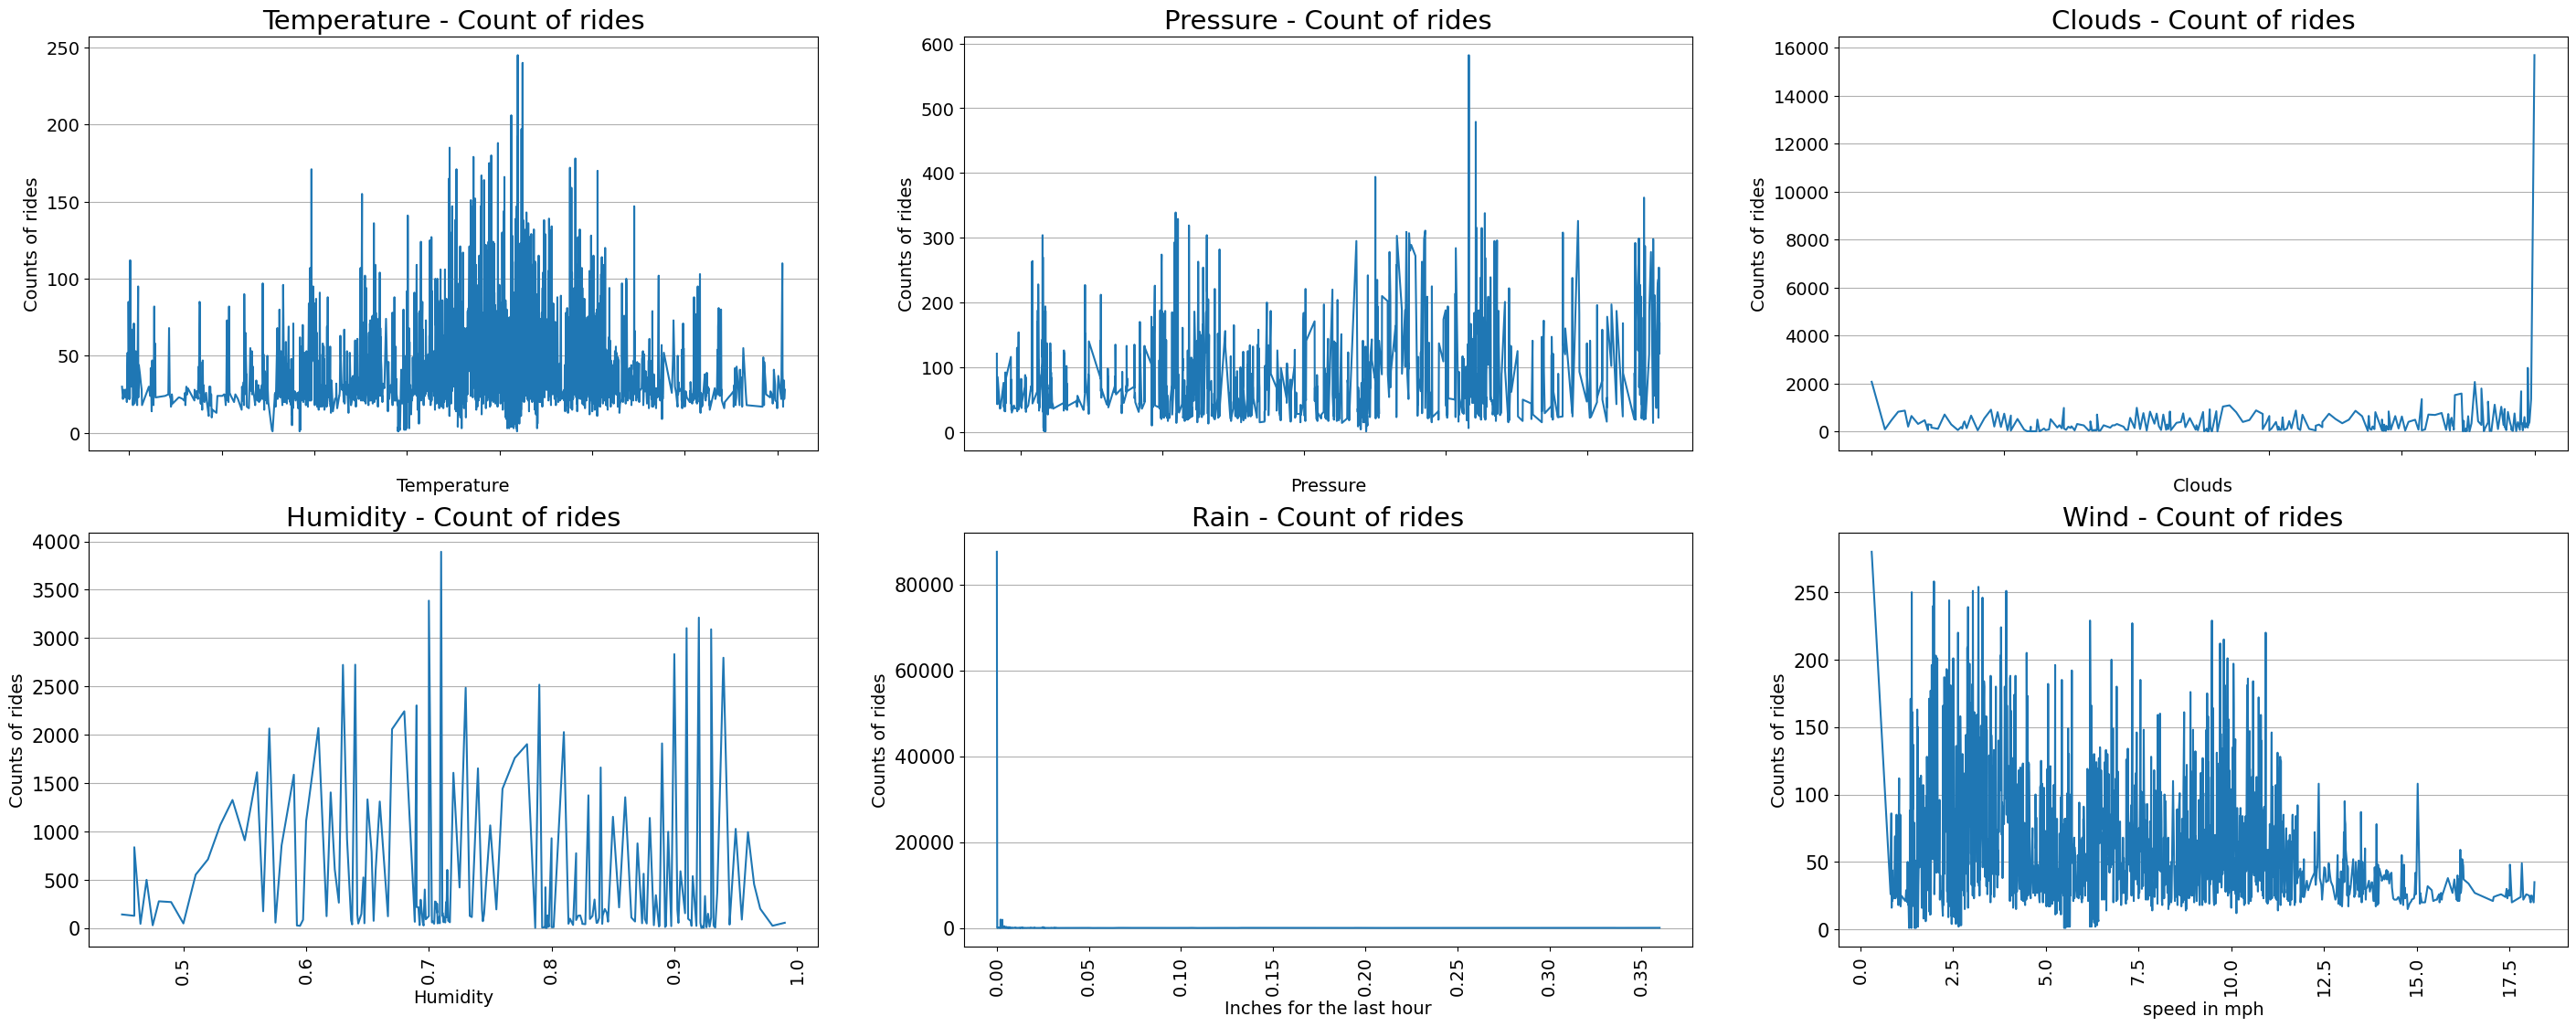

In [ ]:
plt.figure(figsize=((35,20)))
plt.grid(axis='y')

plt.subplot(3,3,1)
merged_ride.groupby('temp')['id'].count().plot()
plt.xticks(color='white')
plt.yticks(fontsize=14)
plt.xlabel('Temperature',fontsize=14)
plt.ylabel('Counts of rides',fontsize=14)
plt.title('Temperature - Count of rides',fontsize=21)
plt.grid(axis='y')

plt.subplot(3,3,2)
merged_ride.groupby('pressure')['id'].count().plot()
plt.xticks(color='white')
plt.yticks(fontsize=14)
plt.xlabel('Pressure',fontsize=14)
plt.ylabel('Counts of rides',fontsize=14)
plt.title('Pressure - Count of rides',fontsize=21)
plt.grid(axis='y')

plt.subplot(3,3,3)
merged_ride.groupby('clouds')['id'].count().plot()
plt.xticks(color='white')
plt.yticks(fontsize=14)
plt.xlabel('Clouds',fontsize=14)
plt.ylabel('Counts of rides',fontsize=14)
plt.title('Clouds - Count of rides',fontsize=21)
plt.grid(axis='y')

plt.subplot(3,3,4)
merged_ride.groupby('humidity')['id'].count().plot()
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=15)
plt.xlabel('Humidity',fontsize=14)
plt.ylabel('Counts of rides',fontsize=14)
plt.title('Humidity - Count of rides',fontsize=21)
plt.grid(axis='y')

plt.subplot(3,3,5)
merged_ride.groupby('rain')['id'].count().plot()
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=15)
plt.xlabel('Inches for the last hour',fontsize=14)
plt.ylabel('Counts of rides',fontsize=14)
plt.title('Rain - Count of rides',fontsize=21)
plt.grid(axis='y')

plt.subplot(3,3,6)
merged_ride.groupby('wind')['id'].count().plot()
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=15)
plt.xlabel('speed in mph',fontsize=14)
plt.ylabel('Counts of rides',fontsize=14)
plt.title('Wind - Count of rides',fontsize=21)
plt.grid(axis='y')

plt.show()

#Finding correlation between features within the merged dataset

In [ ]:
merged_ride_corr = merged_ride

In [ ]:
destination_mapping = {'Back Bay': 0, 'Beacon Hill': 1, 'Boston University': 2, 'Fenway': 3,
                        'Financial District': 4, 'Haymarket Square': 5, 'North End': 6,
                        'North Station': 7, 'Northeastern University': 8, 'South Station': 9,
                        'Theatre District': 10, 'West End': 11}

source_mapping = {'Back Bay': 0, 'Beacon Hill': 1, 'Boston University': 2, 'Fenway': 3,
                   'Financial District': 4, 'Haymarket Square': 5, 'North End': 6,
                   'North Station': 7, 'Northeastern University': 8, 'South Station': 9,
                   'Theatre District': 10, 'West End': 11}

# Map the values using the map function
merged_ride_corr['destination'] = merged_ride_corr['destination'].map(destination_mapping)
merged_ride_corr['source'] = merged_ride_corr['source'].map(source_mapping)
#merged_ride_corr['date'] = merged_ride_corr['date'].astype(str)
merged_ride_corr

distance cab_type                    time_stamp  destination  source  \
0           1.08     Lyft 2018-11-28 19:23:07.778000128            8       0   
1           1.11     Uber 2018-12-13 19:15:03.935000064           11       6   
2           0.72     Lyft 2018-12-18 11:35:05.654000128            5       7   
3           2.48     Uber 2018-12-13 10:40:11.530999808            9       1   
4           3.24     Lyft 2018-12-02 18:23:07.499000064            8       7   
...          ...      ...                           ...          ...     ...   
105851      1.81     Lyft 2018-11-29 01:03:40.023000064            1       6   
105852      3.11     Lyft 2018-11-29 01:47:08.122999808            3      10   
105853      0.91     Uber 2018-11-29 01:47:08.122999808            1       5   
105854      1.61     Uber 2018-12-02 05:28:04.148999936            5      10   
105855      1.00     Uber 2018-12-01 23:53:05.533999872            6      11   

        price  surge_multiplier                                    id  \
0         7.0               1.0  d859ec69-b3ff-4af8-9abd-441e31430c94   
1         7.5               1.0  357559cb-8c58-4278-a41a-e33b2e0997a3   
2         7.0               1.0  5ef44fdf-c5d3-4d07-967a-a8710e537e74   
3         8.5               1.0  4149295f-4534-4712-b2cf-160308528c75   
4        11.0               1.0  174b960d-58f1-4dfd-8672-8b43f13726a7   
...       ...               ...                                   ...   
105851    9.0               1.0  dd63e380-e7f1-4cb8-a513-38e6290b2cf8   
105852   10.5               1.0  aa4e5808-7357-49d3-b539-bd04d4815665   
105853    7.0               1.0  aba6db9d-6b6f-4bb2-b9dd-2ceb1fbd1061   
105854   15.0               1.0  54362c72-124b-47e8-8d07-62a07cfff624   
105855    9.5               1.0  633a3fc3-1f86-4b9e-9d48-2b7132112341   

                                  product_id   name  ...          location  \
0                                       lyft   Lyft  ...          Back Bay   
1       55c66225-fbe7-4fd5-9072-eab1ece5e23e  UberX  ...         North End   
2                                       lyft   Lyft  ...     North Station   
3       55c66225-fbe7-4fd5-9072-eab1ece5e23e  UberX  ...       Beacon Hill   
4                                       lyft   Lyft  ...     North Station   
...                                      ...    ...  ...               ...   
105851                                  lyft   Lyft  ...         North End   
105852                                  lyft   Lyft  ...  Theatre District   
105853  55c66225-fbe7-4fd5-9072-eab1ece5e23e  UberX  ...  Haymarket Square   
105854  55c66225-fbe7-4fd5-9072-eab1ece5e23e  UberX  ...  Theatre District   
105855  55c66225-fbe7-4fd5-9072-eab1ece5e23e  UberX  ...          West End   

        date_weather  time_weather       temp clouds     pressure    rain  \
0         2018-11-28          19.0  40.883333  1.000   992.113333  0.0000   
1         2018-12-13          19.0  32.750000  0.510  1033.750000  0.0000   
2         2018-12-18          11.0  23.650000  0.640  1006.820000  0.0000   
3         2018-12-13          10.0  20.030000  0.430  1031.070000  0.0000   
4         2018-12-02          18.0  48.340000  0.990  1006.020000  0.0030   
...              ...           ...        ...    ...          ...     ...   
105851    2018-11-29           1.0  38.484000  0.613   997.468000  0.0020   
105852    2018-11-29           1.0  38.301000  0.619   997.487000  0.0013   
105853    2018-11-29           1.0  38.454000  0.614   997.475000  0.0020   
105854    2018-12-02           5.0  37.010000  0.830  1021.650000  0.0000   
105855    2018-12-01          23.0  36.690000  0.410  1023.640000  0.0000   

        humidity    wind            date_location_weather  
0       0.646667   9.610         Back Bay, 2018-11-28, 19  
1       0.570000   1.900        North End, 2018-12-13, 19  
2       0.540000  16.190    North Station, 2018-12-18, 11  
3       0.630000   3.800      Beacon Hill, 2018-12-13, 10  
4       

<Axes: >

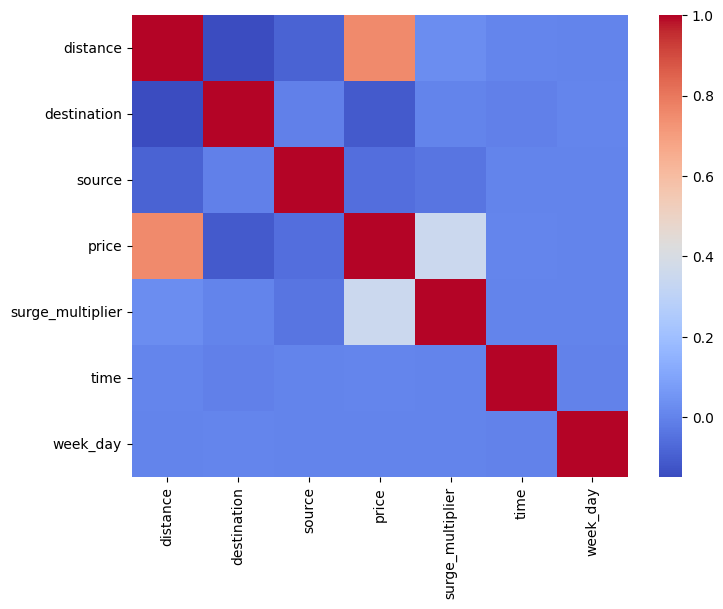

In [ ]:
corr_matrix = X.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='coolwarm')

#Splitting the dataset and training the model uing SVM

In [ ]:
columns_to_drop = ['id', 'product_id', 'time_stamp', 'cab_type', 'name', 'date_location', 'date', 'location', 'date_weather', 'time_weather', 'date_location_weather']

In [ ]:
X = merged_ride.drop(columns_to_drop, axis=1)
y = merged_ride['cab_type']
X

distance  destination  source  price  surge_multiplier  time  \
0           1.08            8       0    7.0               1.0    19   
1           1.11           11       6    7.5               1.0    19   
2           0.72            5       7    7.0               1.0    11   
3           2.48            9       1    8.5               1.0    10   
4           3.24            8       7   11.0               1.0    18   
...          ...          ...     ...    ...               ...   ...   
105851      1.81            1       6    9.0               1.0     1   
105852      3.11            3      10   10.5               1.0     1   
105853      0.91            1       5    7.0               1.0     1   
105854      1.61            5      10   15.0               1.0     5   
105855      1.00            6      11    9.5               1.0    23   

        week_day       temp  clouds     pressure    rain  humidity    wind  
0              2  40.883333   1.000   992.113333  0.0000  0.646667   9.610  
1              3  32.750000   0.510  1033.750000  0.0000  0.570000   1.900  
2              1  23.650000   0.640  1006.820000  0.0000  0.540000  16.190  
3              3  20.030000   0.430  1031.070000  0.0000  0.630000   3.800  
4              6  48.340000   0.990  1006.020000  0.0030  0.940000   4.110  
...          ...        ...     ...          ...     ...       ...     ...  
105851         3  38.484000   0.613   997.468000  0.0020  0.709000  10.257  
105852         3  38.301000   0.619   997.487000  0.0013  0.714000  10.246  
105853         3  38.454000   0.614   997.475000  0.0020  0.711000  10.238  
105854         6  37.010000   0.830  1021.650000  0.0000  0.850000   1.600  
105855         5  36.690000   0.410  1023.640000  0.0000  0.760000   2.510  

[105856 rows x 13 columns]

In [ ]:

# destination_mapping = {'Back Bay': 0, 'Beacon Hill': 1, 'Boston University': 2, 'Fenway': 3,
#                         'Financial District': 4, 'Haymarket Square': 5, 'North End': 6,
#                         'North Station': 7, 'Northeastern University': 8, 'South Station': 9,
#                         'Theatre District': 10, 'West End': 11}

# source_mapping = {'Back Bay': 0, 'Beacon Hill': 1, 'Boston University': 2, 'Fenway': 3,
#                    'Financial District': 4, 'Haymarket Square': 5, 'North End': 6,
#                    'North Station': 7, 'Northeastern University': 8, 'South Station': 9,
#                    'Theatre District': 10, 'West End': 11}

# # Map the values using the map function
# X['destination'] = X['destination'].map(destination_mapping)
# X['source'] = X['source'].map(source_mapping)
# #X['date'] = X['date'].astype(str)
# X

distance  destination  source  price  surge_multiplier  time  \
0           1.08          NaN     NaN    7.0               1.0    19   
1           1.11          NaN     NaN    7.5               1.0    19   
2           0.72          NaN     NaN    7.0               1.0    11   
3           2.48          NaN     NaN    8.5               1.0    10   
4           3.24          NaN     NaN   11.0               1.0    18   
...          ...          ...     ...    ...               ...   ...   
105851      1.81          NaN     NaN    9.0               1.0     1   
105852      3.11          NaN     NaN   10.5               1.0     1   
105853      0.91          NaN     NaN    7.0               1.0     1   
105854      1.61          NaN     NaN   15.0               1.0     5   
105855      1.00          NaN     NaN    9.5               1.0    23   

        week_day       temp  clouds     pressure    rain  humidity    wind  
0              2  40.883333   1.000   992.113333  0.0000  0.646667   9.610  
1              3  32.750000   0.510  1033.750000  0.0000  0.570000   1.900  
2              1  23.650000   0.640  1006.820000  0.0000  0.540000  16.190  
3              3  20.030000   0.430  1031.070000  0.0000  0.630000   3.800  
4              6  48.340000   0.990  1006.020000  0.0030  0.940000   4.110  
...          ...        ...     ...          ...     ...       ...     ...  
105851         3  38.484000   0.613   997.468000  0.0020  0.709000  10.257  
105852         3  38.301000   0.619   997.487000  0.0013  0.714000  10.246  
105853         3  38.454000   0.614   997.475000  0.0020  0.711000  10.238  
105854         6  37.010000   0.830  1021.650000  0.0000  0.850000   1.600  
105855         5  36.690000   0.410  1023.640000  0.0000  0.760000   2.510  

[105856 rows x 13 columns]

In [ ]:
y = y.replace({'Uber': 0, 'Lyft': 1})
y

0         1
1         0
2         1
3         0
4         1
         ..
105851    1
105852    1
105853    0
105854    0
105855    0
Name: cab_type, Length: 105856, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
svc_clf = SVC()
svc_clf.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = svc_clf.predict(X_test)

#Evaluating the performance of model using various performace metrics

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

Precision= precision_score(y_test, y_pred, average='weighted')
F1_Score= f1_score(y_test, y_pred, average='weighted')
Recall= recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print('Recall :', Recall)
print('Precision :', Precision)
print('F1-SCore :', F1_Score)

Accuracy: 0.5181534779733602
Recall : 0.0
Precision : 0.2684830267358895
F1-SCore : 0.35369681739200376


Here the svm is performed after compining the datasets, i.e., with considering weather features also.

#Visualizing the performance using confusion matrix

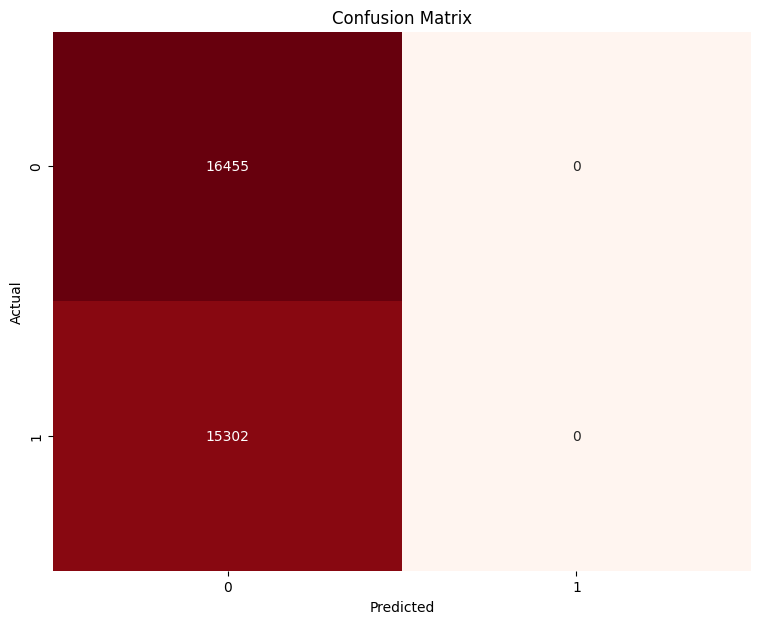

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9, 7))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Splitting the dataset and training the model uing logistic regression

In [ ]:
X

distance  destination  source  price  surge_multiplier  time  \
0           1.08            8       0    7.0               1.0    19   
1           1.11           11       6    7.5               1.0    19   
2           0.72            5       7    7.0               1.0    11   
3           2.48            9       1    8.5               1.0    10   
4           3.24            8       7   11.0               1.0    18   
...          ...          ...     ...    ...               ...   ...   
105851      1.81            1       6    9.0               1.0     1   
105852      3.11            3      10   10.5               1.0     1   
105853      0.91            1       5    7.0               1.0     1   
105854      1.61            5      10   15.0               1.0     5   
105855      1.00            6      11    9.5               1.0    23   

        week_day       temp  clouds     pressure    rain  humidity    wind  
0              2  40.883333   1.000   992.113333  0.0000  0.646667   9.610  
1              3  32.750000   0.510  1033.750000  0.0000  0.570000   1.900  
2              1  23.650000   0.640  1006.820000  0.0000  0.540000  16.190  
3              3  20.030000   0.430  1031.070000  0.0000  0.630000   3.800  
4              6  48.340000   0.990  1006.020000  0.0030  0.940000   4.110  
...          ...        ...     ...          ...     ...       ...     ...  
105851         3  38.484000   0.613   997.468000  0.0020  0.709000  10.257  
105852         3  38.301000   0.619   997.487000  0.0013  0.714000  10.246  
105853         3  38.454000   0.614   997.475000  0.0020  0.711000  10.238  
105854         6  37.010000   0.830  1021.650000  0.0000  0.850000   1.600  
105855         5  36.690000   0.410  1023.640000  0.0000  0.760000   2.510  

[105856 rows x 13 columns]

In [ ]:
'''from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 8],  # Regularization parameter
    'kernel': ['linear', 'rbf'],
   'gamma': ['scale', 'auto', 0.1, 1],
   'shrinking': [True, False],
}

# Create SVC classifier
svc_clf = SVC()

# Create GridSearchCV object
grid_search = GridSearchCV(svc_clf, param_grid, scoring='accuracy', cv=5)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Train the SVC classifier with the best parameters
best_svc_clf = SVC(**best_params)
best_svc_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_svc_clf.predict(X_test)

# Calculate evaluation metrics
precision = precision_score(y_test, y_pred, average='weighted')
f1_score = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print('Recall:', recall)
print('Precision:', precision)
print('F1-Score:', f1_score)
'''

'from sklearn.model_selection import GridSearchCV\nfrom sklearn.svm import SVC\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)\n\n# Define the parameter grid\nparam_grid = {\n    \'C\': [0.1, 1, 8],  # Regularization parameter\n    \'kernel\': [\'linear\', \'rbf\'],\n   \'gamma\': [\'scale\', \'auto\', 0.1, 1],\n   \'shrinking\': [True, False],\n}\n\n# Create SVC classifier\nsvc_clf = SVC()\n\n# Create GridSearchCV object\ngrid_search = GridSearchCV(svc_clf, param_grid, scoring=\'accuracy\', cv=5)\n\n# Fit the model to the training data\ngrid_search.fit(X_train, y_train)\n\n# Get the best parameters from the grid search\nbest_params = grid_search.best_params_\n\n# Train the SVC classifier with the best parameters\nbest_svc_clf = SVC(**best_params)\nbest_svc_clf.fit(X_train, y_train)\n\n# Make predictions on the test set\ny_pred = best_svc_clf.predict(X_test)\n\n# Calculate evaluation metrics\nprecision = precision_score(y_test, y

In [ ]:
columns_to_drop = ['id', 'product_id', 'time_stamp', 'cab_type', 'name', 'date_location', 'date', 'location', 'date_weather', 'time_weather', 'date_location_weather']

In [ ]:
X = merged_ride.drop(columns_to_drop, axis=1)
y = merged_ride['cab_type']

In [ ]:
# destination_mapping = {'Back Bay': 0, 'Beacon Hill': 1, 'Boston University': 2, 'Fenway': 3,
#                         'Financial District': 4, 'Haymarket Square': 5, 'North End': 6,
#                         'North Station': 7, 'Northeastern University': 8, 'South Station': 9,
#                         'Theatre District': 10, 'West End': 11}

# source_mapping = {'Back Bay': 0, 'Beacon Hill': 1, 'Boston University': 2, 'Fenway': 3,
#                    'Financial District': 4, 'Haymarket Square': 5, 'North End': 6,
#                    'North Station': 7, 'Northeastern University': 8, 'South Station': 9,
#                    'Theatre District': 10, 'West End': 11}

# # Map the values using the map function
# X['destination'] = X['destination'].map(destination_mapping)
# X['source'] = X['source'].map(source_mapping)
# #X['date'] = X['date'].astype(str)
# X

distance  destination  source  price  surge_multiplier  time  \
0           1.08          NaN     NaN    7.0               1.0    19   
1           1.11          NaN     NaN    7.5               1.0    19   
2           0.72          NaN     NaN    7.0               1.0    11   
3           2.48          NaN     NaN    8.5               1.0    10   
4           3.24          NaN     NaN   11.0               1.0    18   
...          ...          ...     ...    ...               ...   ...   
105851      1.81          NaN     NaN    9.0               1.0     1   
105852      3.11          NaN     NaN   10.5               1.0     1   
105853      0.91          NaN     NaN    7.0               1.0     1   
105854      1.61          NaN     NaN   15.0               1.0     5   
105855      1.00          NaN     NaN    9.5               1.0    23   

        week_day       temp  clouds     pressure    rain  humidity    wind  
0              2  40.883333   1.000   992.113333  0.0000  0.646667   9.610  
1              3  32.750000   0.510  1033.750000  0.0000  0.570000   1.900  
2              1  23.650000   0.640  1006.820000  0.0000  0.540000  16.190  
3              3  20.030000   0.430  1031.070000  0.0000  0.630000   3.800  
4              6  48.340000   0.990  1006.020000  0.0030  0.940000   4.110  
...          ...        ...     ...          ...     ...       ...     ...  
105851         3  38.484000   0.613   997.468000  0.0020  0.709000  10.257  
105852         3  38.301000   0.619   997.487000  0.0013  0.714000  10.246  
105853         3  38.454000   0.614   997.475000  0.0020  0.711000  10.238  
105854         6  37.010000   0.830  1021.650000  0.0000  0.850000   1.600  
105855         5  36.690000   0.410  1023.640000  0.0000  0.760000   2.510  

[105856 rows x 13 columns]

In [ ]:
y = y.replace({'Uber': 0, 'Lyft': 1})
y

0         1
1         0
2         1
3         0
4         1
         ..
105851    1
105852    1
105853    0
105854    0
105855    0
Name: cab_type, Length: 105856, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
logistic_regression = LogisticRegression()

In [ ]:
logistic_regression.fit(X_train, y_train)

LogisticRegression()

##Evaluting the performace of model using various performance metrics

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

Precision= precision_score(y_test, y_pred, average='weighted')
F1_Score= f1_score(y_test, y_pred, average='weighted')
Recall= recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print('Recall :', Recall)
print('Precision :', Precision)
print('F1-SCore :', F1_Score)

Accuracy: 0.5261832037031206
Recall : 0.37890471833747225
Precision : 0.5232844701674102
F1-SCore : 0.5164129019560225


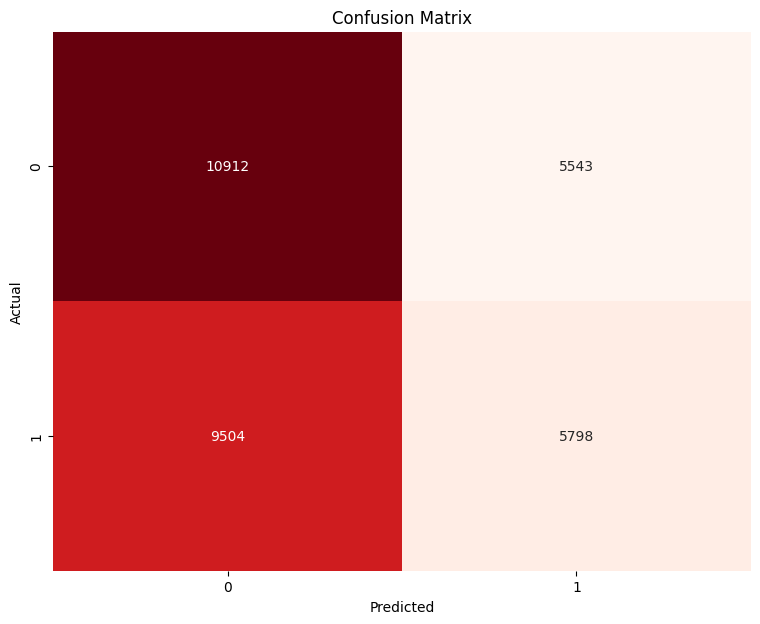

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9, 7))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Splitting the dataset and training the model uing KNN

In [ ]:
columns_to_drop = ['id', 'product_id', 'time_stamp', 'cab_type', 'name', 'date_location', 'date', 'location', 'date_weather', 'time_weather', 'date_location_weather']

In [ ]:
X = merged_ride.drop(columns_to_drop, axis=1)
y = merged_ride['cab_type']

In [ ]:
# destination_mapping = {'Back Bay': 0, 'Beacon Hill': 1, 'Boston University': 2, 'Fenway': 3,
#                         'Financial District': 4, 'Haymarket Square': 5, 'North End': 6,
#                         'North Station': 7, 'Northeastern University': 8, 'South Station': 9,
#                         'Theatre District': 10, 'West End': 11}

# source_mapping = {'Back Bay': 0, 'Beacon Hill': 1, 'Boston University': 2, 'Fenway': 3,
#                    'Financial District': 4, 'Haymarket Square': 5, 'North End': 6,
#                    'North Station': 7, 'Northeastern University': 8, 'South Station': 9,
#                    'Theatre District': 10, 'West End': 11}

# # Map the values using the map function
# X['destination'] = X['destination'].map(destination_mapping)
# X['source'] = X['source'].map(source_mapping)
# #X['date'] = X['date'].astype(str)
# X

In [ ]:
y = y.replace({'Uber': 0, 'Lyft': 1})
y

0         1
1         0
2         1
3         0
4         1
         ..
105851    1
105852    1
105853    0
105854    0
105855    0
Name: cab_type, Length: 105856, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
knn_classifier = KNeighborsClassifier()

In [ ]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_classifier.predict(X_test)

##Evaluating the performance of the model using various metrics

In [ ]:
Precision= precision_score(y_test, y_pred, average='weighted')
F1_Score= f1_score(y_test, y_pred, average='weighted')
Recall= recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print('Recall :', Recall)
print('Precision :', Precision)
print('F1-SCore :', F1_Score)

Accuracy: 0.5655760934597097
Recall : 0.5526075022872827
Precision : 0.5656823071095006
F1-SCore : 0.5656231389210454


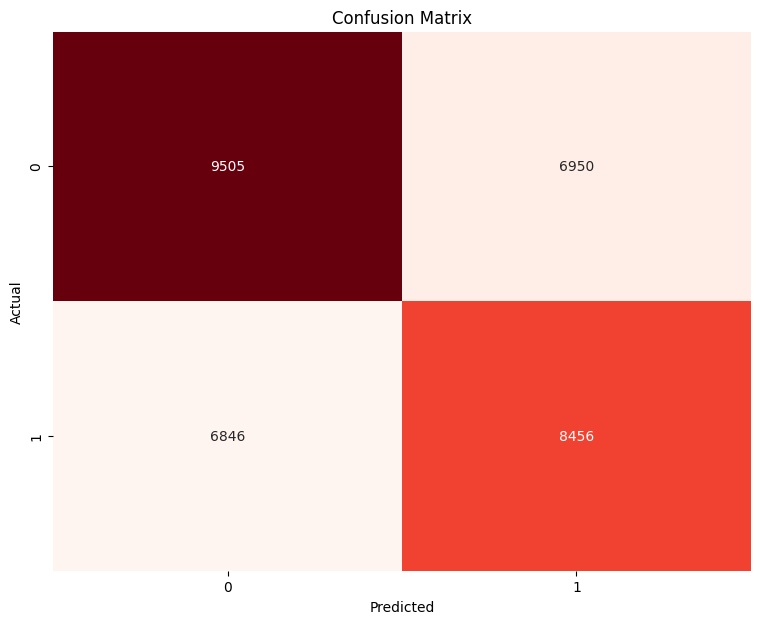

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9, 7))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

After combining the dataset also KNN performed better. So now lets perform hyperparameter tuning on KNN.

#Hyperparameter tuning the KNN model using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Assuming X and y are defined

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 9, 147, 148, 149, 150],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create KNN classifier
knn_classifier = KNeighborsClassifier()

# Create GridSearchCV object
grid_search = GridSearchCV(knn_classifier, param_grid, scoring='accuracy', cv=5)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Train the KNN classifier with the best parameters
best_knn_classifier = KNeighborsClassifier(**best_params)
best_knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_knn_classifier.predict(X_test)

# Calculate evaluation metrics
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print('Recall:', recall)
print('Precision:', precision)
print('F1-Score:', f1)


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 148, 'weights': 'distance'}
Accuracy: 0.6744969612998709
Recall: 0.6237093190432623
Precision: 0.6745825507816439
F1-Score: 0.6736047521648824


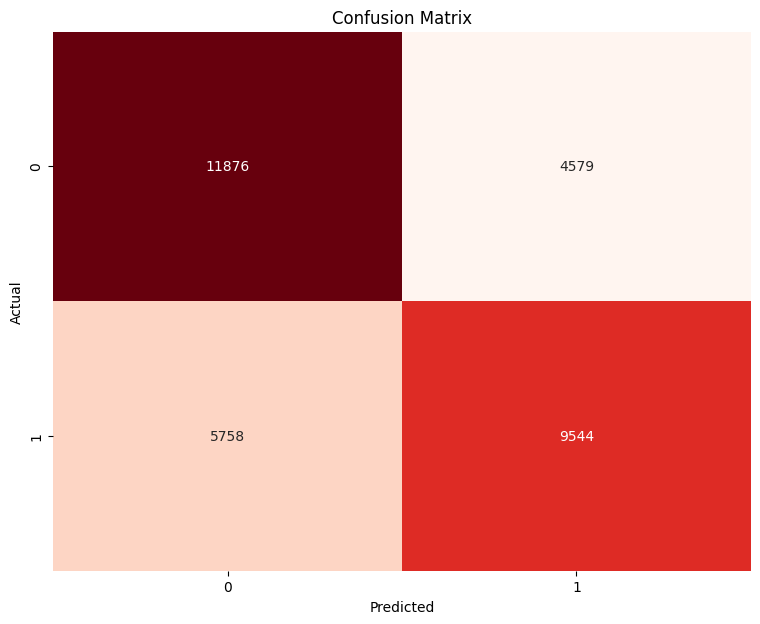

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9, 7))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

After performing hyperparameter tuning the accuracy of KNN have increased.